# Projekt - Metody Eskploracji Danych
Zespół nr 4: <br>
-Mateusz Kawka <br>
-Patryk Dulnikiewicz <br>

## Wstęp

Celem projektu jest przeprowadzenie analizy eksploracyjnej a następnie analizy regresyjnej dla danych dotyczących samochodów wystawionych na aukcjach na niemieckej wersji platformy ebay. Postawionym celem jest zbadanie,które poszczególne cechy aut wpływają na ich cenę i w jakim stopniu.
Użyte dane zostały pozyskane w wyniku webscrapingu danych z niemieckej platformy ebay.

## Wstępne przetworzenie i analiza dancyh

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from math import log

import warnings
warnings.filterwarnings("ignore")

# Ustawienie (większej niż standardowa) czcionki dla wykresów
font = {'family' : 'monospace',
        'size' : 18}
plt.rc('font', **font)

In [2]:
data = pd.read_csv('autos.csv', encoding='ISO-8859-1')
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


>Jako że kolumna notRepairedDamage nie zawiera informacji o stopniu uszkodzenia pojazdu, mogą się tam znajdować zarówno pojazdy z niesprawną jedną lub wieloma częściami, przez co cena tych pojazdów może się bardzo wahać. 
>W związku z tym postanowiliśmy pozostawić tylko rekordy z pojazdami nie uszkodzonymi.

In [3]:
print('Liczba rekordów z pojazdami uszkodzonymi: {}'.format(len(data[data['notRepairedDamage']  == 'ja'])))

Liczba rekordów z pojazdami uszkodzonymi: 36286


In [4]:
# odrzucenie rekordów z uszkodzonymi pojazdami
df = data[data.notRepairedDamage != 'ja']
# odrzucenie zbędnych kolumn
df.drop(['dateCrawled', 'name', 'abtest', 'model', 'notRepairedDamage', 'lastSeen', 'dateCreated', 'postalCode'], axis = 1, inplace = True)

In [5]:
display(df.info())
display(df.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335242 entries, 0 to 371527
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               335242 non-null  object
 1   offerType            335242 non-null  object
 2   price                335242 non-null  int64 
 3   vehicleType          301273 non-null  object
 4   yearOfRegistration   335242 non-null  int64 
 5   gearbox              316562 non-null  object
 6   powerPS              335242 non-null  int64 
 7   kilometer            335242 non-null  int64 
 8   monthOfRegistration  335242 non-null  int64 
 9   fuelType             305806 non-null  object
 10  brand                335242 non-null  object
 11  nrOfPictures         335242 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 33.3+ MB


None

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,nrOfPictures
count,335242,335242,3.352420e+05,301273,335242.000000,316562,335242.000000,335242.000000,335242.000000,305806,335242,335242.0
unique,2,2,NaN,8,NaN,2,NaN,NaN,NaN,7,40,NaN
top,privat,Angebot,NaN,limousine,NaN,manuell,NaN,NaN,NaN,benzin,volkswagen,NaN
freq,335239,335232,NaN,87116,NaN,245622,NaN,NaN,NaN,200714,72629,NaN
mean,NaN,NaN,1.206363e+04,NaN,2004.895091,NaN,116.879660,124513.769158,5.777683,NaN,NaN,0.0
std,NaN,NaN,6.921145e+05,NaN,96.639712,NaN,189.878121,40689.239617,3.698924,NaN,NaN,0.0
min,NaN,NaN,0.000000e+00,NaN,1000.000000,NaN,0.000000,5000.000000,0.000000,NaN,NaN,0.0
25%,NaN,NaN,1.300000e+03,NaN,1999.000000,NaN,71.000000,100000.000000,3.000000,NaN,NaN,0.0
50%,NaN,NaN,3.300000e+03,NaN,2004.000000,NaN,107.000000,150000.000000,6.000000,NaN,NaN,0.0
75%,NaN,NaN,7.800000e+03,NaN,2008.000000,NaN,150.000000,150000.000000,9.000000,NaN,NaN,0.0


>Przed usunięciem wybrakowanych danych i wartości odstających, na macierzy korelacji widać praktyczny brak korelacji wśród par cech.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'yearOfRegistration'),
  Text(0, 2.5, 'powerPS'),
  Text(0, 3.5, 'kilometer'),
  Text(0, 4.5, 'monthOfRegistration'),
  Text(0, 5.5, 'nrOfPictures')])

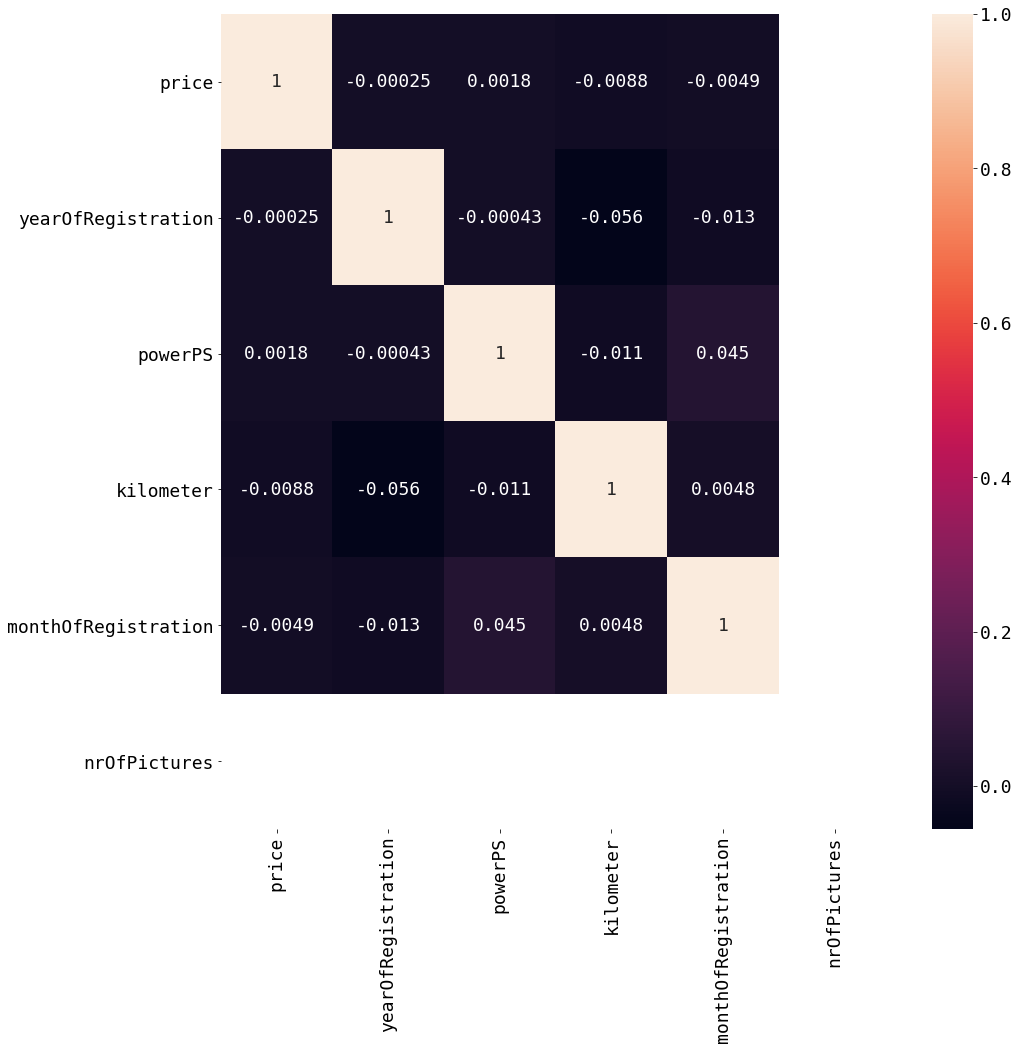

In [6]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
plt.yticks(rotation = 0)

In [7]:
for i in range(len(df.columns)):
    print('{}: {}\n'.format(df.columns[i], df.iloc[:,i].unique()))

seller: ['privat' 'gewerblich']

offerType: ['Angebot' 'Gesuch']

price: [  480  9800  1500 ... 18429 24895 10985]

vehicleType: [nan 'suv' 'kleinwagen' 'cabrio' 'limousine' 'bus' 'kombi' 'coupe'
 'andere']

yearOfRegistration: [1993 2004 2001 2008 1980 2014 1998 1995 2011 1910 2016 2007 2009 2002
 2018 1997 2017 1981 2003 1994 1991 1984 1990 2006 1999 2012 2005 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 1500 2200 4100 1929 1951 1957 1940
 3000 2066 1949 2019 1800 1953 1935 1234 8000 5300 2900 6000 5900 5911
 1400 1950 4000 1948 1952 1200 8500 1932 1255 1927 1923 3700 3800 4800
 1942 7000 1911 6500 9000 2290 2500 1930 1001 6200 9450 1944 1943 1947
 1934 1938 1688 2800 1253 1928 1931 7500 5555 7777 5600 1600 2222 1039
 9996 1300 8455 1915 4500 1920 1939 7800 9229 1946 7100 8200 3

>Wśród 335242 rekordów:
>* aż 335239 wartości cechy seller to 'privat' (3 rekordy mają inną wartość)
>* aż 335232 wartości cechy offerType to 'angebot (10 rekordów ma inną wartość)
>* wszystkie wartości cechy nrOfPicture to 0
>
>W związku z tym uznaliśmy te cechy za zbędne i usuneliśmy je.

In [8]:
# odrzucenie kolejnych zbędnych kolumn
df.drop(['nrOfPictures', 'seller', 'offerType'], axis = 1, inplace = True)
# odrzucenie rekordów z cena, mocą silnika lub miesiącem równym 0
df.drop(df[df.price == 0].index, inplace = True)
df.drop(df[df.powerPS <= 30].index, inplace = True)
df.drop(df[df.monthOfRegistration == 0].index, inplace = True)
# odrzucenie wybrakowanych danych
df.dropna(inplace = True)

df = df[df['yearOfRegistration'] <= 2016]
df = df[df['kilometer'] != 5000]

In [9]:
print(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249829 entries, 2 to 371527
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                249829 non-null  int64 
 1   vehicleType          249829 non-null  object
 2   yearOfRegistration   249829 non-null  int64 
 3   gearbox              249829 non-null  object
 4   powerPS              249829 non-null  int64 
 5   kilometer            249829 non-null  int64 
 6   monthOfRegistration  249829 non-null  int64 
 7   fuelType             249829 non-null  object
 8   brand                249829 non-null  object
dtypes: int64(5), object(4)
memory usage: 19.1+ MB
None


,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand
count,2.498290e+05,249829,249829.000000,249829,249829.000000,249829.000000,249829.000000,249829,249829
unique,NaN,8,NaN,2,NaN,NaN,NaN,7,40
top,NaN,limousine,NaN,manuell,NaN,NaN,NaN,benzin,volkswagen
freq,NaN,73428,NaN,190488,NaN,NaN,NaN,160454,52809
mean,8.436730e+03,NaN,2003.470122,NaN,132.495387,124362.924240,6.384591,NaN,NaN
std,2.956884e+05,NaN,6.461518,NaN,163.159588,38760.764455,3.344518,NaN,NaN
min,1.000000e+00,NaN,1923.000000,NaN,31.000000,10000.000000,1.000000,NaN,NaN
25%,1.800000e+03,NaN,2000.000000,NaN,86.000000,100000.000000,4.000000,NaN,NaN
50%,4.200000e+03,NaN,2004.000000,NaN,116.000000,150000.000000,6.000000,NaN,NaN
75%,8.999000e+03,NaN,2008.000000,NaN,160.000000,150000.000000,9.000000,NaN,NaN


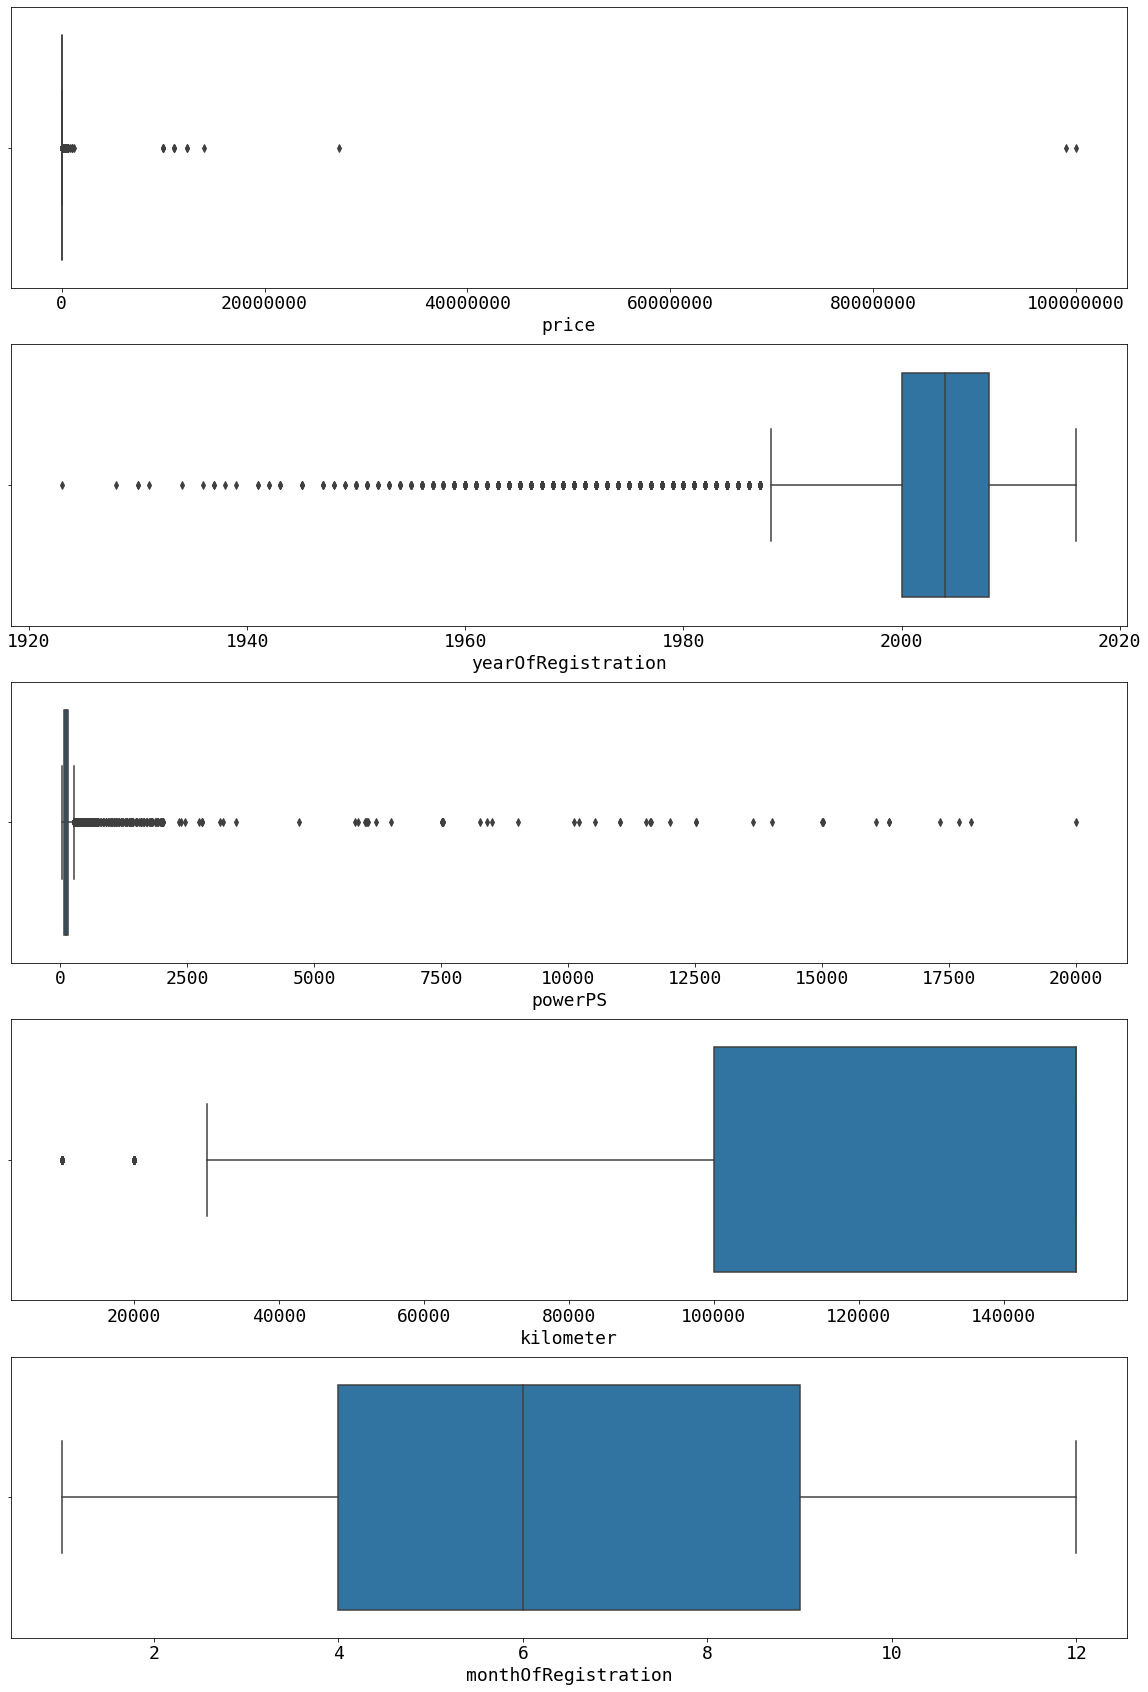

In [10]:
tmpFeatures = df.select_dtypes([np.number]).columns.values

plt.figure(figsize = (20, 30))
for i, ft in enumerate(tmpFeatures):
    plt.subplot(5, 1, i+1)
    plt.ticklabel_format(style='plain')
    sns.boxplot(df[ft])

* Jak widać po wykresach pudełkowych w zbiorach wartości takich cech jak cena , rocznik czy moc silnika znajduje się sporo wartości odstajacych.  

In [11]:
# Usunięcie rekordów z wartościami odstającymi
print('Liczba pojazdów o cenie wyższej niż 40 tys.: {}'.format(len(df[df['price'] > 4e+04])))
df.drop(df[df.price > 4e+04].index, inplace = True)

print('Liczba pojazdów o roczniku starszym niż 1980: {}'.format(len(df[df['yearOfRegistration'] < 1980])))
df.drop(df[df.yearOfRegistration < 1980].index, inplace = True)

print('Liczba pojazdów o mocy większej niż 400 KM: {}'.format(len(df[df['powerPS'] > 400])))
df.drop(df[df.powerPS > 400].index, inplace = True)

# Usunięcie rekordów z prawdopodobnie zaniżnoną ceną pojazdu
# Zakładamy że minimalna kwota to 500
print('Liczba pojazdów o cenie niższej niż 500: {}'.format(len(df[df['price'] < 500])))
df.drop(df[df.price < 500].index, inplace = True)

Liczba pojazdów o cenie wyższej niż 40 tys.: 2174
Liczba pojazdów o roczniku starszym niż 1980: 1756
Liczba pojazdów o mocy większej niż 400 KM: 889
Liczba pojazdów o cenie niższej niż 500: 6581


In [12]:
print('Liczba rekordów po usunięciu wartości odstającyh i wybrakowanych danych: {}'.format(len(df)))

Liczba rekordów po usunięciu wartości odstającyh i wybrakowanych danych: 238429


>Po pozbyciu się wartości odstających i wybrakowanych rekordów, wśród par cech widoczna jest korelacja.

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'yearOfRegistration'),
  Text(0, 2.5, 'powerPS'),
  Text(0, 3.5, 'kilometer'),
  Text(0, 4.5, 'monthOfRegistration')])

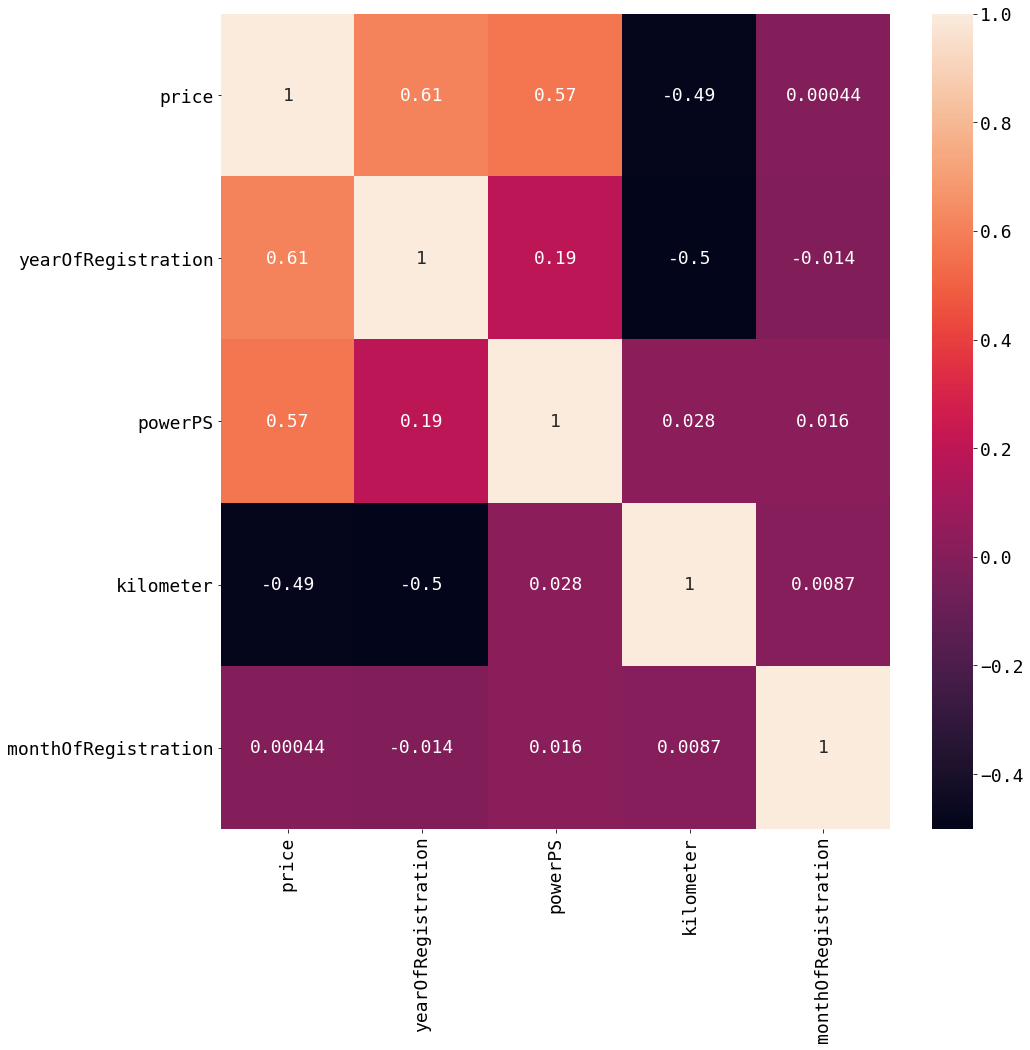

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
plt.yticks(rotation = 0)

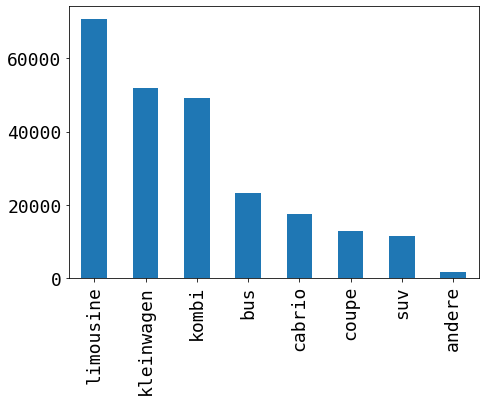

In [14]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
plt_vT = df.vehicleType.value_counts().plot(kind = 'bar')

> W zbiorze danych można zauważyć, że najpopularniejszy typ samochodu to limuzyna. <br>
> Bardzo popularne są także kleinwagen - czyli klasyczny mniejszy samochód oraz kombi. <br>
> Bus i cabrio także mają znaczną ilość wystąpień - około 20 tys. Blisko tego jest także coupe i suv. <br>
> Andere jest najmniej popularny.

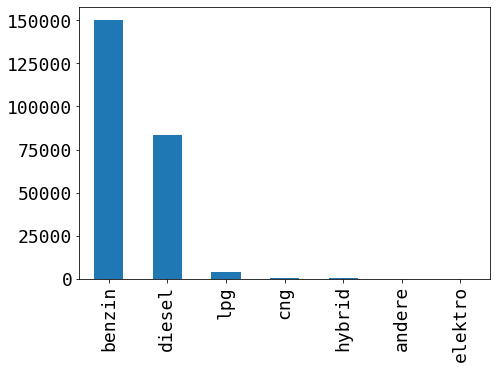

In [15]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
plt_fT = df.fuelType.value_counts().plot(kind = 'bar')

> Największa ilość samochodów w zbiorze działa na benzynie oraz dieslu. Zasilanie resztą paliw nie jest aż tak popularne.

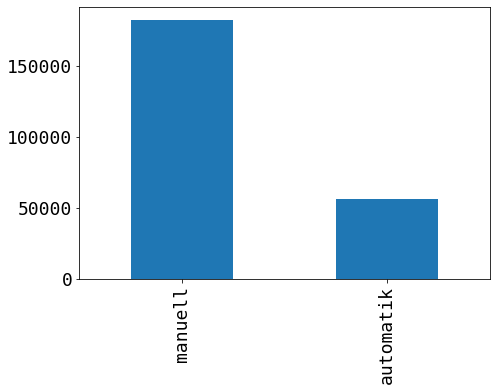

In [16]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
plt_g = df.gearbox.value_counts().plot(kind = 'bar')

> Większość samochodów ma manualną skrzynię biegu. Samochody z automatyczną skrzynią biegów są w liczności 3 razy mniejszej.

## Kodowanie wartości cech kategorycznych 

>Postanowiliśmy podzielić marki na 3 grupy Budget, Average, Luxurious.
>W tym celu zliczyliśmy sumy cen dla poszczególnych marek i podziału dokonamy na podstawie średniej ceny pojazdu każdej z marek.
>
>Następnie wszystkie cechy kategoryczne zakodujemy przy użyciu 'kod 1 z n' (one-hot encoding).

In [17]:
d = {k: [0, 0] for k in df.brand.unique()}
print(d)
for i in range(0, len(df)):
    # df.iloc[i, 8] to marka z i-tego rekordu
    # df.iloc[i, 0] to cena z i-tego rekordu
    d[df.iloc[i, 8]][0] += df.iloc[i, 0]
    d[df.iloc[i, 8]][1] += 1

print(d)

{'jeep': [0, 0], 'volkswagen': [0, 0], 'skoda': [0, 0], 'peugeot': [0, 0], 'ford': [0, 0], 'mazda': [0, 0], 'nissan': [0, 0], 'renault': [0, 0], 'mercedes_benz': [0, 0], 'bmw': [0, 0], 'honda': [0, 0], 'fiat': [0, 0], 'mini': [0, 0], 'smart': [0, 0], 'subaru': [0, 0], 'volvo': [0, 0], 'mitsubishi': [0, 0], 'opel': [0, 0], 'audi': [0, 0], 'hyundai': [0, 0], 'alfa_romeo': [0, 0], 'seat': [0, 0], 'suzuki': [0, 0], 'lancia': [0, 0], 'porsche': [0, 0], 'citroen': [0, 0], 'toyota': [0, 0], 'kia': [0, 0], 'dacia': [0, 0], 'daihatsu': [0, 0], 'chrysler': [0, 0], 'sonstige_autos': [0, 0], 'jaguar': [0, 0], 'saab': [0, 0], 'daewoo': [0, 0], 'rover': [0, 0], 'chevrolet': [0, 0], 'land_rover': [0, 0], 'trabant': [0, 0], 'lada': [0, 0]}
{'jeep': [6179226, 546], 'volkswagen': [325046273, 50865], 'skoda': [31058767, 4335], 'peugeot': [28155023, 7198], 'ford': [67877145, 14900], 'mazda': [18230685, 3647], 'nissan': [18129993, 3136], 'renault': [31128552, 9920], 'mercedes_benz': [215943889, 24855], 'bm

In [18]:
averagePrice = {k: [] for k in df.brand.unique()}
for brand in df.brand.unique():
    averagePrice[brand] = d[brand][0] / d[brand][1]
    
# sortowanie averagePrice
averagePrice = {k: v for k, v in sorted(averagePrice.items(), key=lambda item: item[1])}

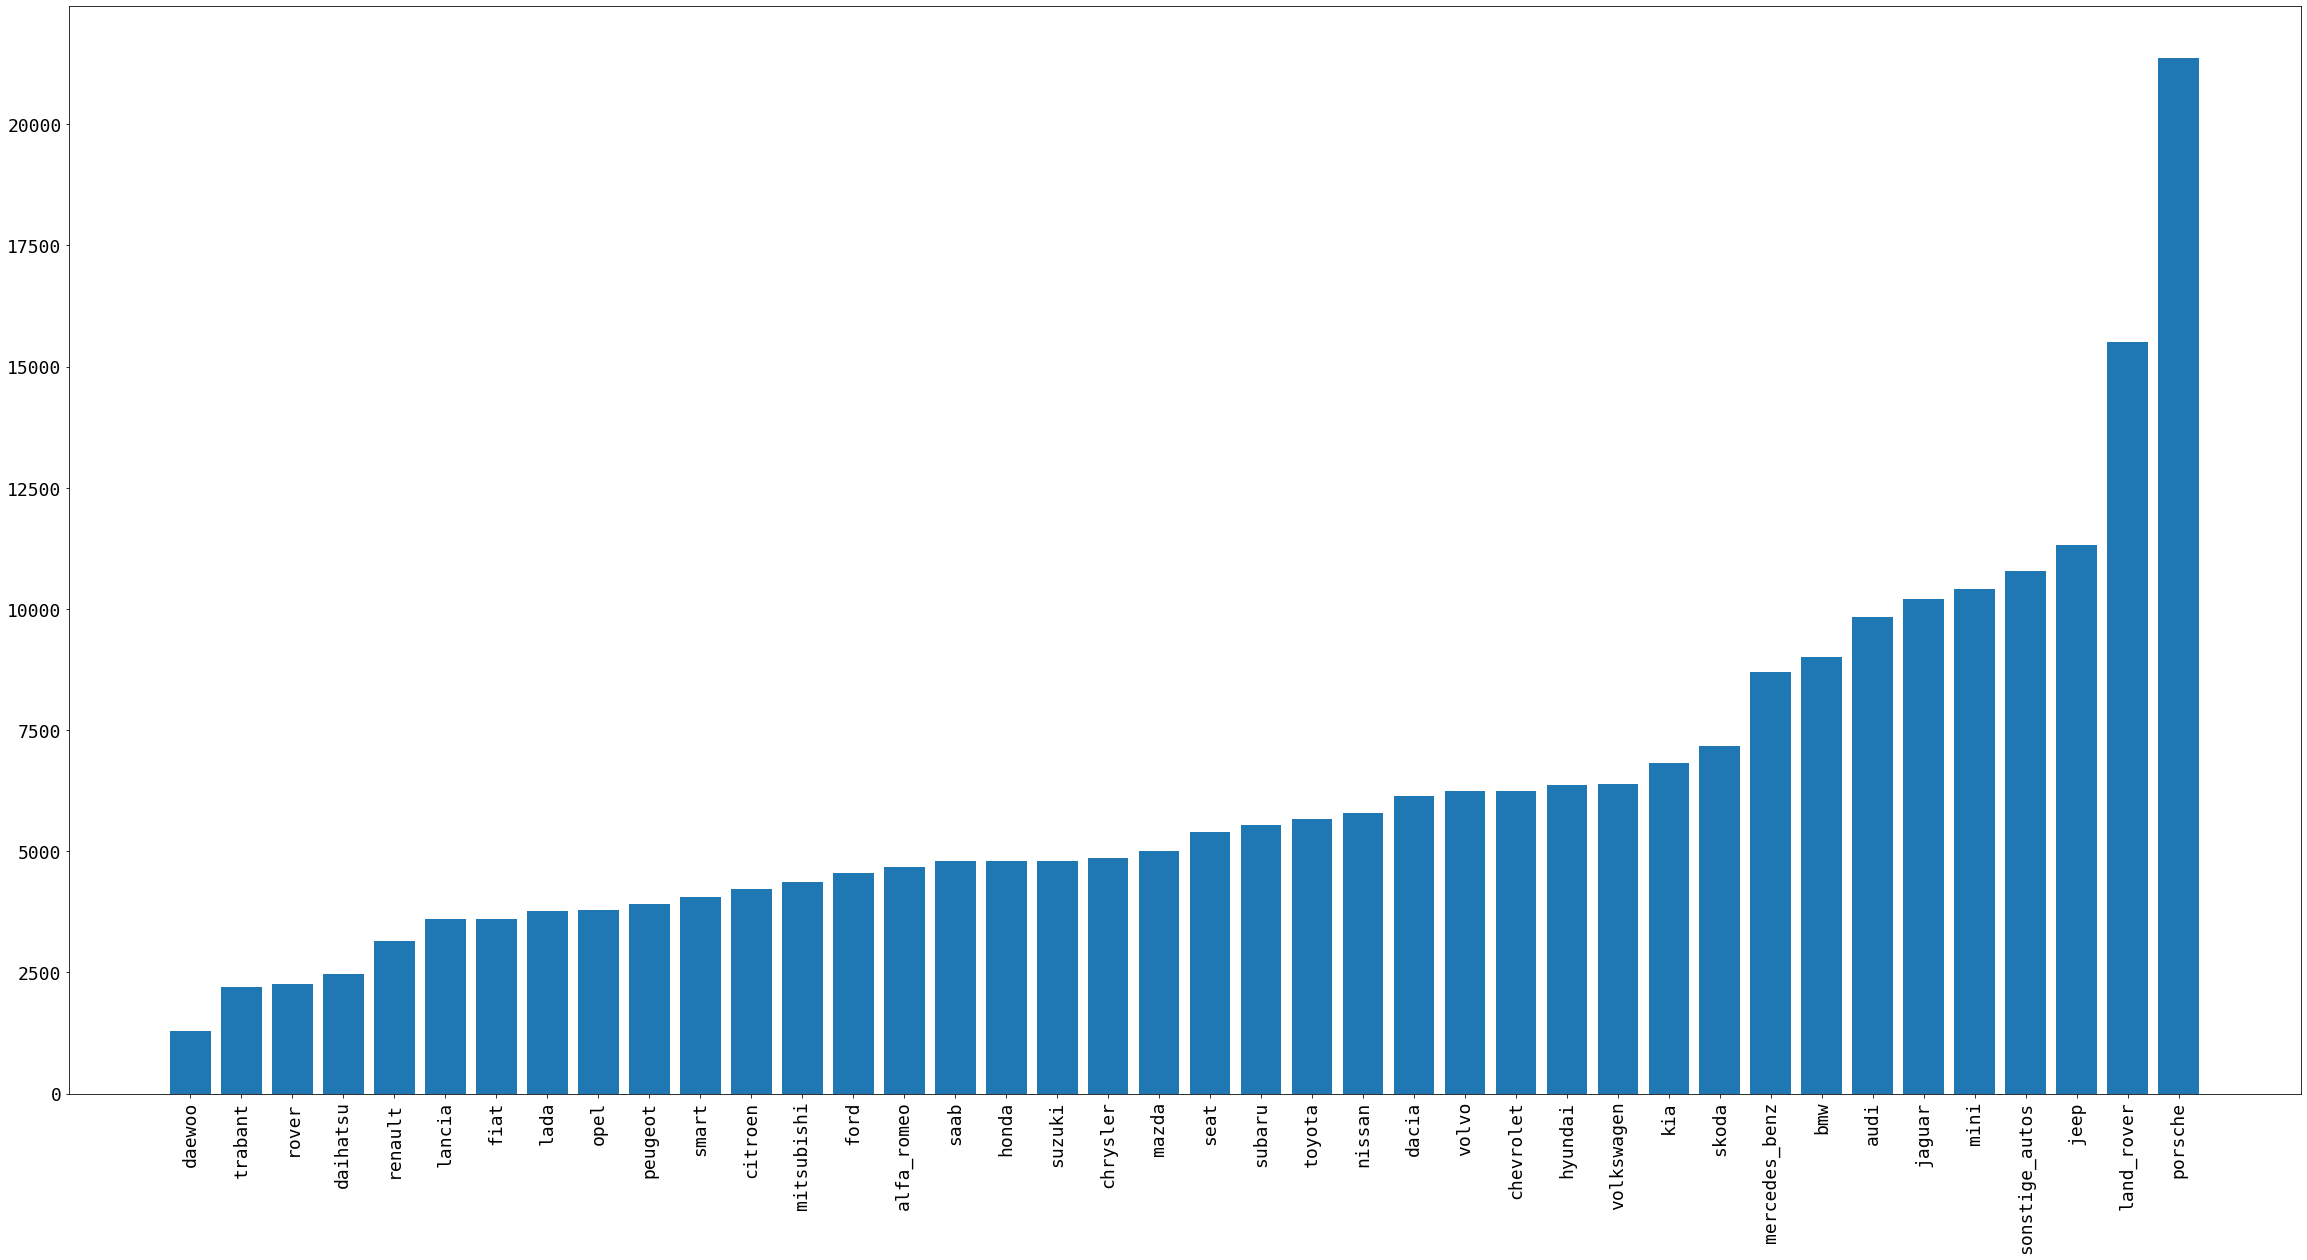

In [19]:
plt.figure(figsize= (40, 20))
plt.bar(range(len(averagePrice)), list(averagePrice.values()), align='center')
plt.xticks(range(len(averagePrice)), list(averagePrice.keys()), rotation = 90)
plt.show()

>Od najwyższych średnich pierwsze 9 marek będzie należało do grupy Luxurious - te auta są zazwyczaj najdroższe, <br>
>kolejne 18 należy do grupy Average - auta o cenach nie za wysokich ale też nie małych,
>a ostatnie 13 do grupy Budget - najtańsze analizowane marki aut.

In [20]:
bud = list(averagePrice.keys())[:13]
ave = list(averagePrice.keys())[13:31]
lux = list(averagePrice.keys())[31:]

In [21]:
df['budget'] = df.apply (lambda row: int(row.brand in bud), axis = 1)
df['average'] = df.apply (lambda row: int(row.brand in ave), axis = 1)
df['luxurious'] = df.apply (lambda row: int(row.brand in lux), axis = 1)

In [22]:
df = pd.get_dummies(df, columns=['vehicleType'], prefix='vehicleType', prefix_sep='_')
df = pd.get_dummies(df, columns=['gearbox'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['fuelType'], prefix='fuelType', prefix_sep='_')

In [23]:
df.drop(['brand'], axis = 1, inplace = True)

## Wizualizacja danych

In [24]:
display(df.info())
display(df.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238429 entries, 2 to 371527
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   price                   238429 non-null  int64
 1   yearOfRegistration      238429 non-null  int64
 2   powerPS                 238429 non-null  int64
 3   kilometer               238429 non-null  int64
 4   monthOfRegistration     238429 non-null  int64
 5   budget                  238429 non-null  int64
 6   average                 238429 non-null  int64
 7   luxurious               238429 non-null  int64
 8   vehicleType_andere      238429 non-null  uint8
 9   vehicleType_bus         238429 non-null  uint8
 10  vehicleType_cabrio      238429 non-null  uint8
 11  vehicleType_coupe       238429 non-null  uint8
 12  vehicleType_kleinwagen  238429 non-null  uint8
 13  vehicleType_kombi       238429 non-null  uint8
 14  vehicleType_limousine   238429 non-null  uint8
 15  

None

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,budget,average,luxurious,vehicleType_andere,vehicleType_bus,...,vehicleType_suv,automatik,manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
count,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,...,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000,238429.000000
mean,6625.312147,2003.848181,128.781465,124684.916684,6.398890,0.231155,0.418879,0.349966,0.006492,0.096951,...,0.047998,0.236196,0.763804,0.000138,0.630561,0.001749,0.350712,0.000130,0.000881,0.015829
std,6618.897659,5.695338,56.699537,38360.955697,3.346674,0.421572,0.493377,0.476960,0.080314,0.295892,...,0.213761,0.424745,0.424745,0.011764,0.482654,0.041784,0.477194,0.011402,0.029665,0.124812
min,500.000000,1980.000000,31.000000,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1900.000000,2000.000000,88.000000,100000.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4250.000000,2004.000000,118.000000,150000.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8950.000000,2008.000000,160.000000,150000.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,40000.000000,2016.000000,400.000000,150000.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'yearOfRegistration'),
  Text(0, 2.5, 'powerPS'),
  Text(0, 3.5, 'kilometer'),
  Text(0, 4.5, 'monthOfRegistration'),
  Text(0, 5.5, 'budget'),
  Text(0, 6.5, 'average'),
  Text(0, 7.5, 'luxurious'),
  Text(0, 8.5, 'vehicleType_andere'),
  Text(0, 9.5, 'vehicleType_bus'),
  Text(0, 10.5, 'vehicleType_cabrio'),
  Text(0, 11.5, 'vehicleType_coupe'),
  Text(0, 12.5, 'vehicleType_kleinwagen'),
  Text(0, 13.5, 'vehicleType_kombi'),
  Text(0, 14.5, 'vehicleType_limousine'),
  Text(0, 15.5, 'vehicleType_suv'),
  Text(0, 16.5, 'automatik'),
  Text(0, 17.5, 'manuell'),
  Text(0, 18.5, 'fuelType_andere'),
  Text(0, 19.5, 'fuelType_benzin'),
  Text(0, 20.5, 'fuelType_cng'),
  Text(0, 21.5, 'fuelType_diesel'),
  Text(0, 22.5, 'fuelType_elektro'),
  Text(0, 23.5, 'fuelType_hybrid'),
  T

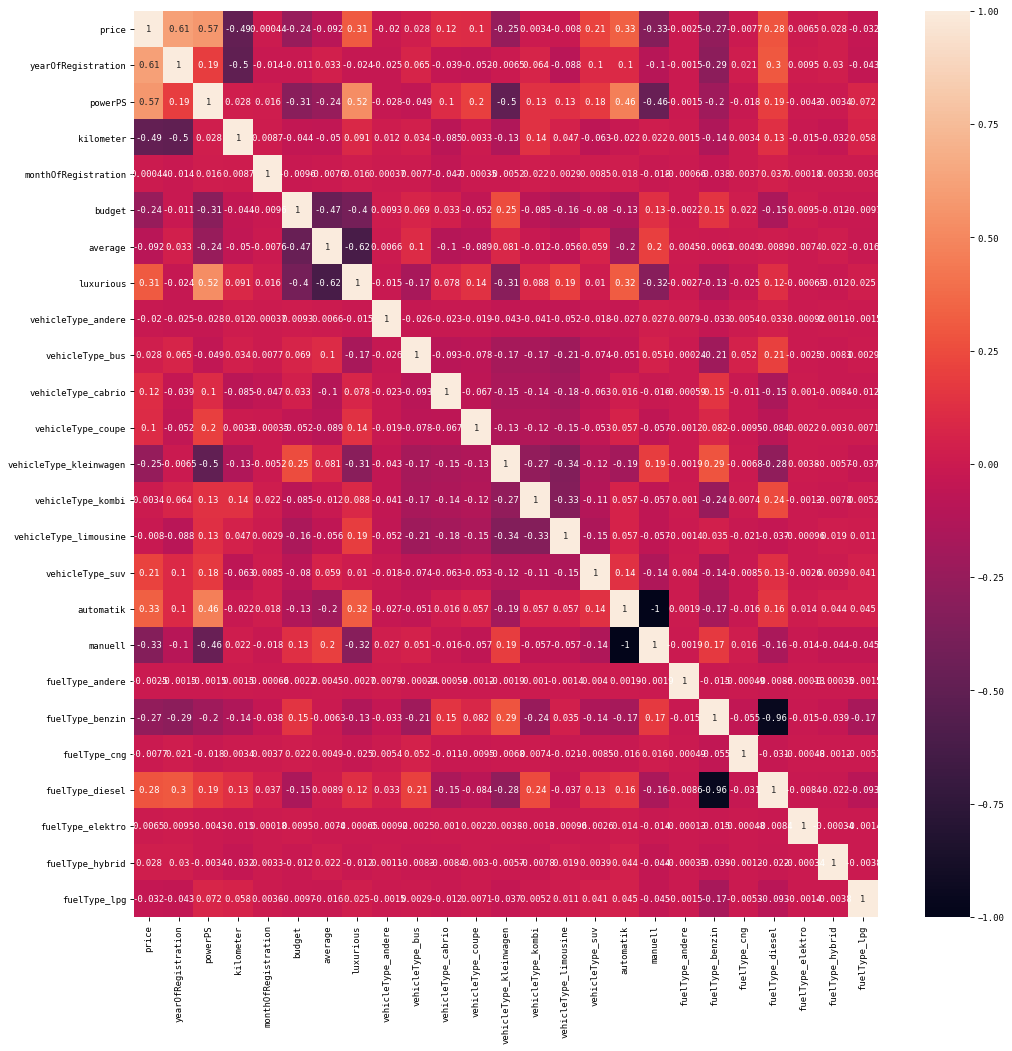

In [25]:
font = {'family' : 'monospace',
        'size' : 8}
plt.rc('font', **font)

plt.figure(figsize = (15,15), dpi=80)
sns.heatmap(df.corr(), annot = True)
plt.yticks(rotation = 0)

> W macierzy zauważamy nie bardzo dużą ale znaczną korelację pomiędzy drogimi markami samochodów "luxurious" a liczbą koni mechanicznych "powerPS". Naturalnie można wnioskować iż im bardziej luksusowy samochód tym w wielu przypadkach więcej zawiera koni mechanicznych. Nie jest to oczywiście stały przypadek dlatego korelacja wynosi tutaj 0.52. <br>

> Sytuacja podobna ma miejsce przy parze "automatik" i "powerPS". Tutaj korelacja jest już lekko niższa bo wsp. wynosi 0.46. Samochody o wysokiej mocy silnika w tym zbiorze częściej mają automatyczną skrzynie biegów. Odwrotnie jest przy parze "manuell" z "powerPS". <br>

> Korelacje takie jak "manuell" z "automatik" mają wsp. = -1 dlatego, że naturalnie samochód nie ma dwóch rodzaji skrzyni biegów na raz.<br>

> Cechy "kilometer" oraz "yearOfRegistration" mają korelację -0.48. Wynika to prawdopodobnie z tego iż samochody o nowszych rocznikach mają dość często mniejszy przebieg wynikający z upłynięcia nie wystarczająco dużego czasu aby nabić wysoką wartość. Wartość wpółczynnika sugeruje, że nie jest to silna korelacja ale jest jak najbardziej zauważalna.<br>

> Para cech "powerPS" oraz "vehicleType_kleinwagen" są w korelacji o wsp. = -0.5. Ponieważ kleinwagen oznacza mały samochód(małolitrażowy) wnioskujemy, że taki rodzaj samochodu ma często małą moc silnika jak sama nazwa wskazuje. <br>

> Zmienna objaśniana "price" jest w korelacji o największym wsp. z cechami "yearOfRegistration" oraz "powerPS", a także w lekko słabszej korelacji z "kilometer". Wskazuje nam to na, że rocznik, moc silnika oraz przebieg są prawdopodobnie najważniejszymi cechami przy określaniu ceny. Im nowszy rocznik i większa moc silnika, a także mniejszy przebieg tym bardziej rośnie cena.

In [26]:
d_powerPs = {k: [0, 0] for k in df.powerPS.unique()}
for i in range(0, len(df)):
    d_powerPs[df.iloc[i, 2]][0] += df.iloc[i, 0]
    d_powerPs[df.iloc[i, 2]][1] += 1

In [27]:
averagePrice_powerPs = {k: [] for k in df.powerPS.unique()}
for powerPs in df.powerPS.unique():
    averagePrice_powerPs[powerPs] = d_powerPs[powerPs][0] / d_powerPs[powerPs][1]
    
averagePrice_powerPs = {k: v for k, v in sorted(averagePrice_powerPs.items(), key=lambda item: item[1])}

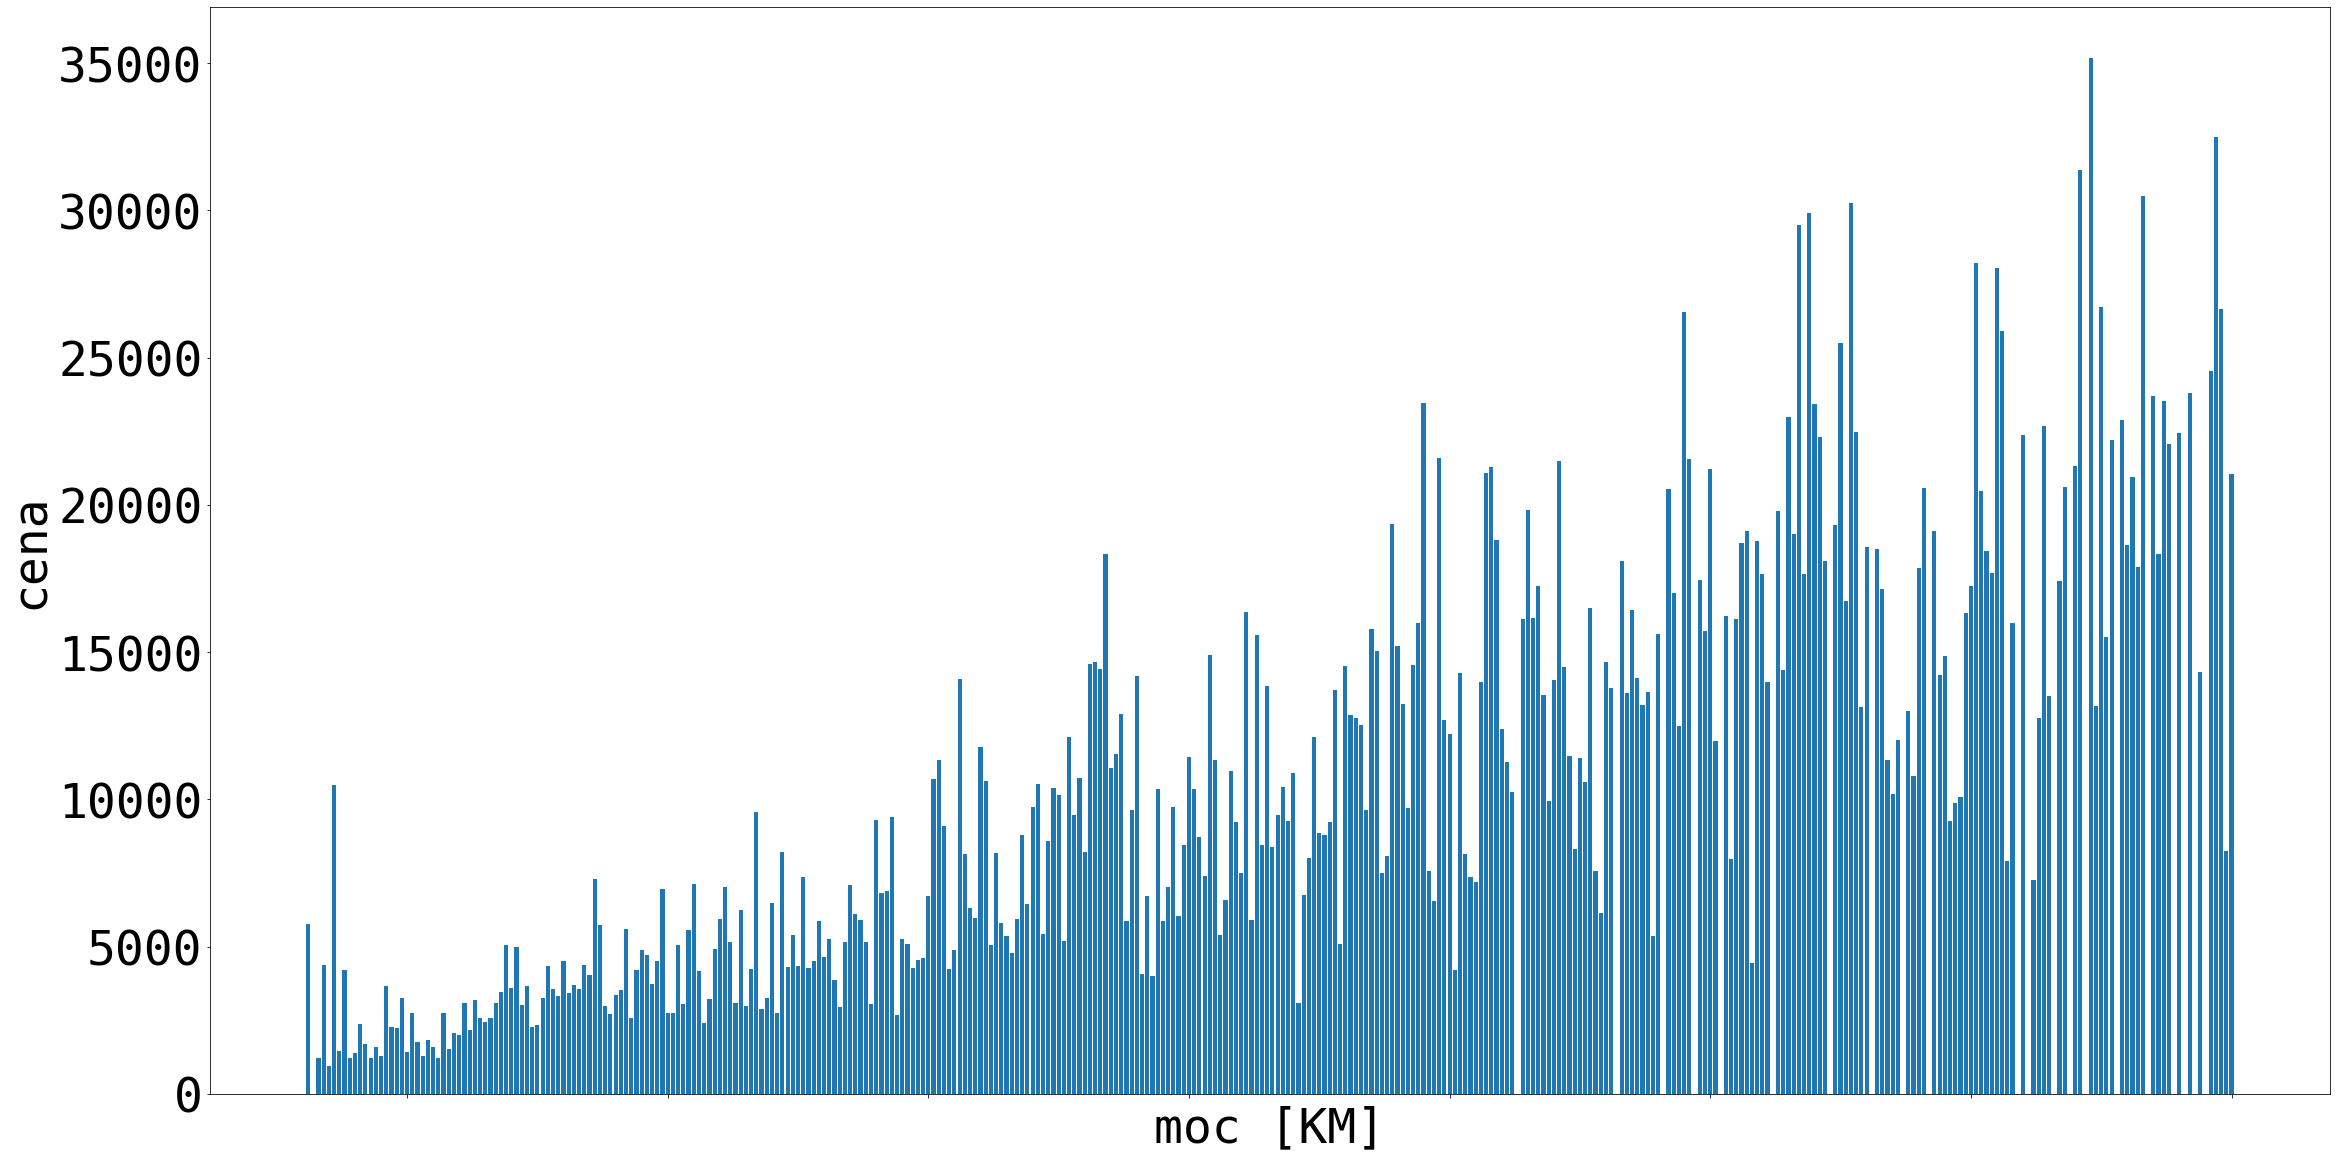

In [28]:
font = {'family' : 'monospace',
        'size' : 48}
plt.rc('font', **font)

tmpx, tmpy = zip(*sorted(averagePrice_powerPs.items()))
plt.figure(figsize= (38, 20))
plt.bar(tmpx, tmpy, align='center')
ax1 = plt.axes()
ax1.set_xlabel("moc [KM]")
ax1.set_ylabel("cena")
#x_axis = ax1.axes.get_xaxis()
ax1.set_xticklabels([])
plt.show()

In [29]:
d_year = {k: [0, 0] for k in df.yearOfRegistration.unique()}
for i in range(0, len(df)):
    d_year[df.iloc[i, 1]][0] += df.iloc[i, 0]
    d_year[df.iloc[i, 1]][1] += 1

In [30]:
averagePrice_year = {k: [] for k in df.yearOfRegistration.unique()}
for year in df.yearOfRegistration.unique():
    averagePrice_year[year] = d_year[year][0] / d_year[year][1]
    
averagePrice_year = {k: v for k, v in sorted(averagePrice_year.items(), key=lambda item: item[1])}

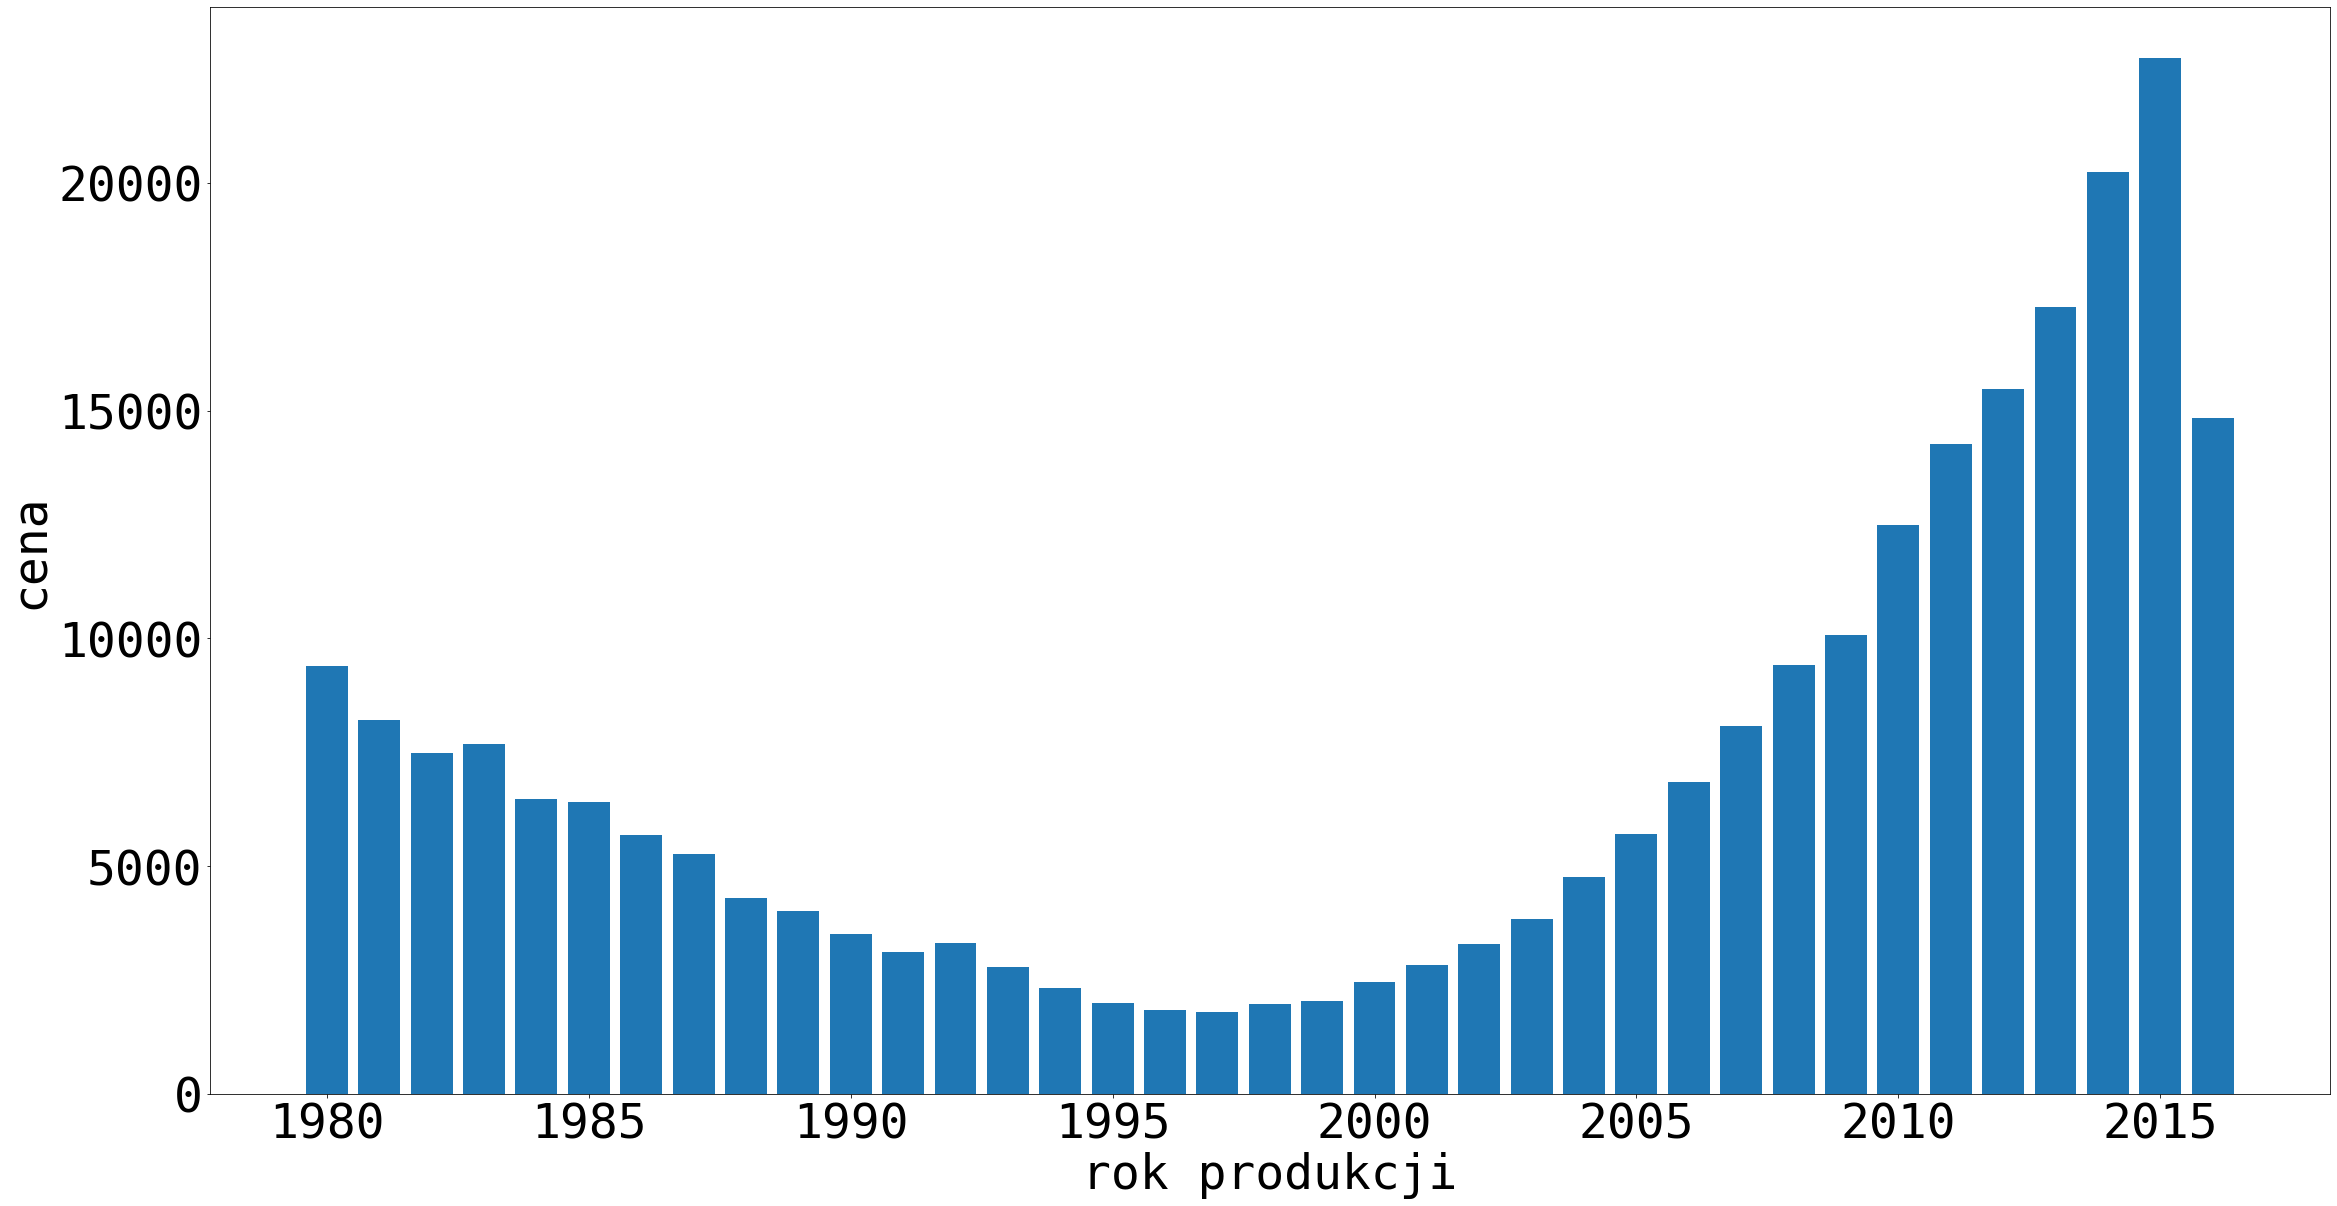

In [31]:
tmpx, tmpy = zip(*sorted(averagePrice_year.items()))
plt.figure(figsize= (38, 20))
plt.bar(tmpx, tmpy, align='center')
ax1 = plt.axes()
ax1.set_xlabel("rok produkcji")
ax1.set_ylabel("cena")
#ax1.set_xticklabels([])
plt.show()

In [32]:
d_kilometer = {k: [0, 0] for k in df.kilometer.unique()}
for i in range(0, len(df)):
    d_kilometer[df.iloc[i, 3]][0] += df.iloc[i, 0]
    d_kilometer[df.iloc[i, 3]][1] += 1

In [33]:
averagePrice_kilometer = {k: [] for k in df.kilometer.unique()}
for kilometer in df.kilometer.unique():
    averagePrice_kilometer[kilometer] = d_kilometer[kilometer][0] / d_kilometer[kilometer][1]
    
averagePrice_kilometer = {k: v for k, v in sorted(averagePrice_kilometer.items(), key=lambda item: item[1], reverse = True)}

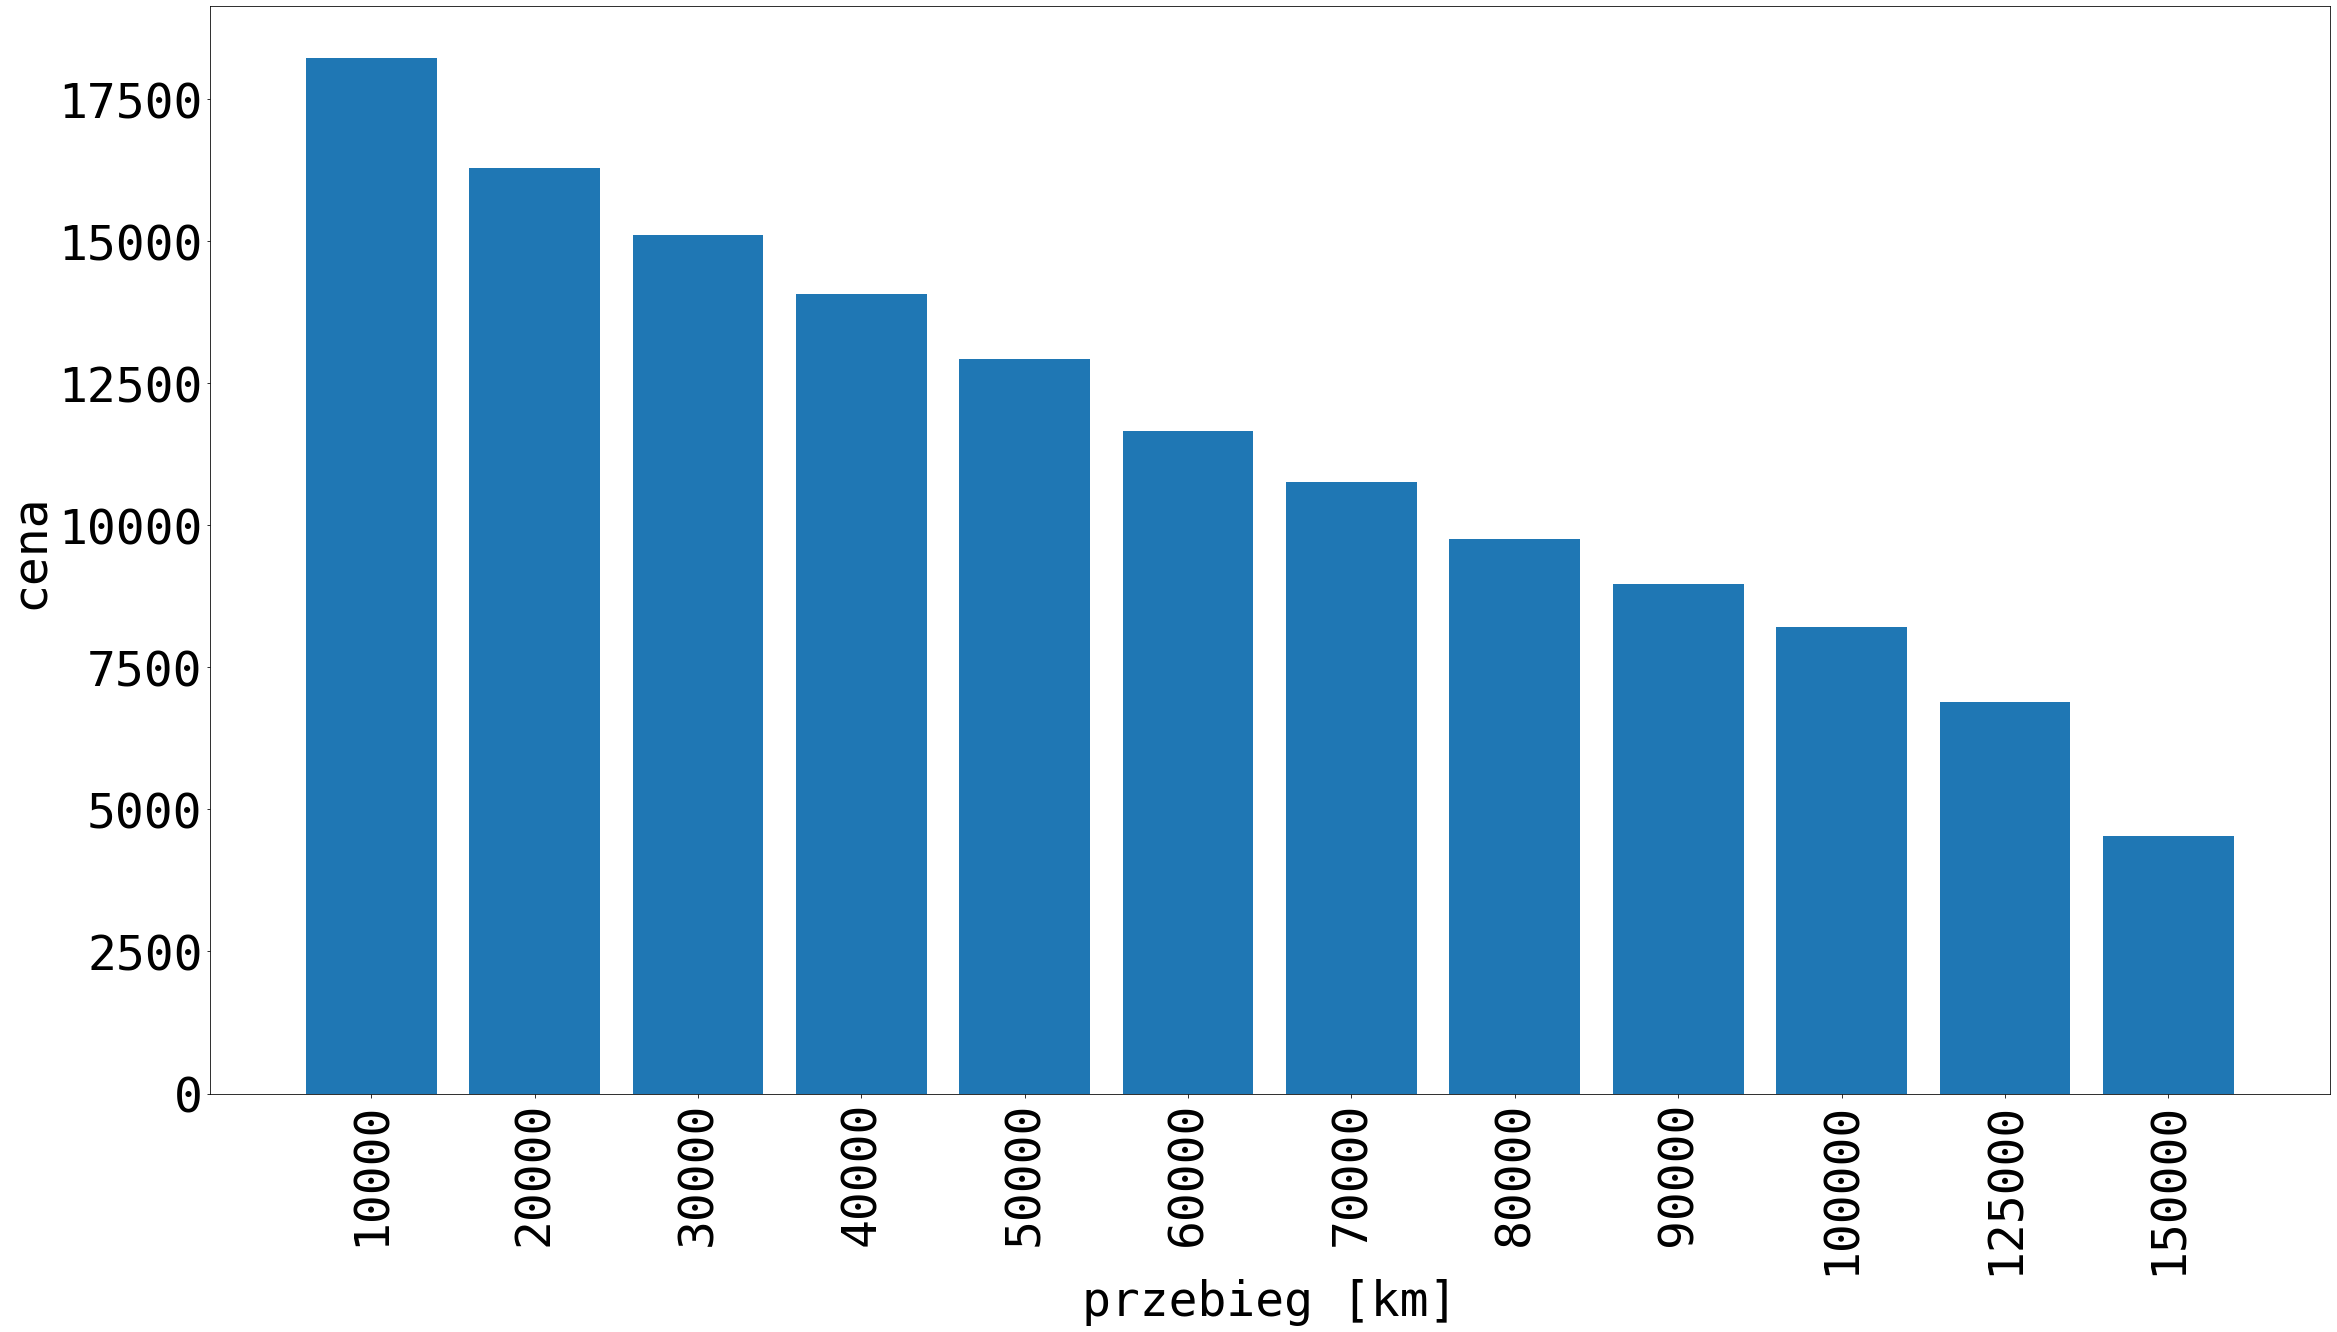

In [34]:
plt.figure(figsize= (38, 20))
plt.bar(range(len(averagePrice_kilometer)), list(averagePrice_kilometer.values()), align='center')
plt.xticks(range(len(averagePrice_kilometer)), list(averagePrice_kilometer.keys()), rotation = 90)
ax1 = plt.axes()
ax1.set_xlabel("przebieg [km]")
ax1.set_ylabel("cena")
plt.show()

> Kontynuując badanie 3 najbardziej skorelowanych zmiennych ze zmienna objaśnianą "price" przedstawiliśmy na wykresach jak wygląda rozkład częstości występowania poszczegónych wartości tych cech w odniesieniu do średniej ceny.<br>
> Jak wskazywała na to korelacja, im bardziej rośnie moc silnika tym większa jest średnia cena samochodu. Wzrost ten jest dosyć płynny jak widać na wykresie, dopiero przy najwyższych mocach cena zaczyna nadzwyczaj szybko rosnąć. <br>
> Również rocznik im wyższy tym średnia cena wyższa. Od rocznika 2010 ceny zaczynają szybko nabierać wysokich wartości. <br>
> W przypadku przebiegu natomiast widzimy, jak maleje cena wraz z jego wzrostem. Ciekawą rzeczą jest, iż najwięcej samochodów ma właśnie akurat b. wysoki przebieg.

In [35]:
font = {'family' : 'monospace',
        'size' : 18}
plt.rc('font', **font)

feats5 = df.columns.values[:5]

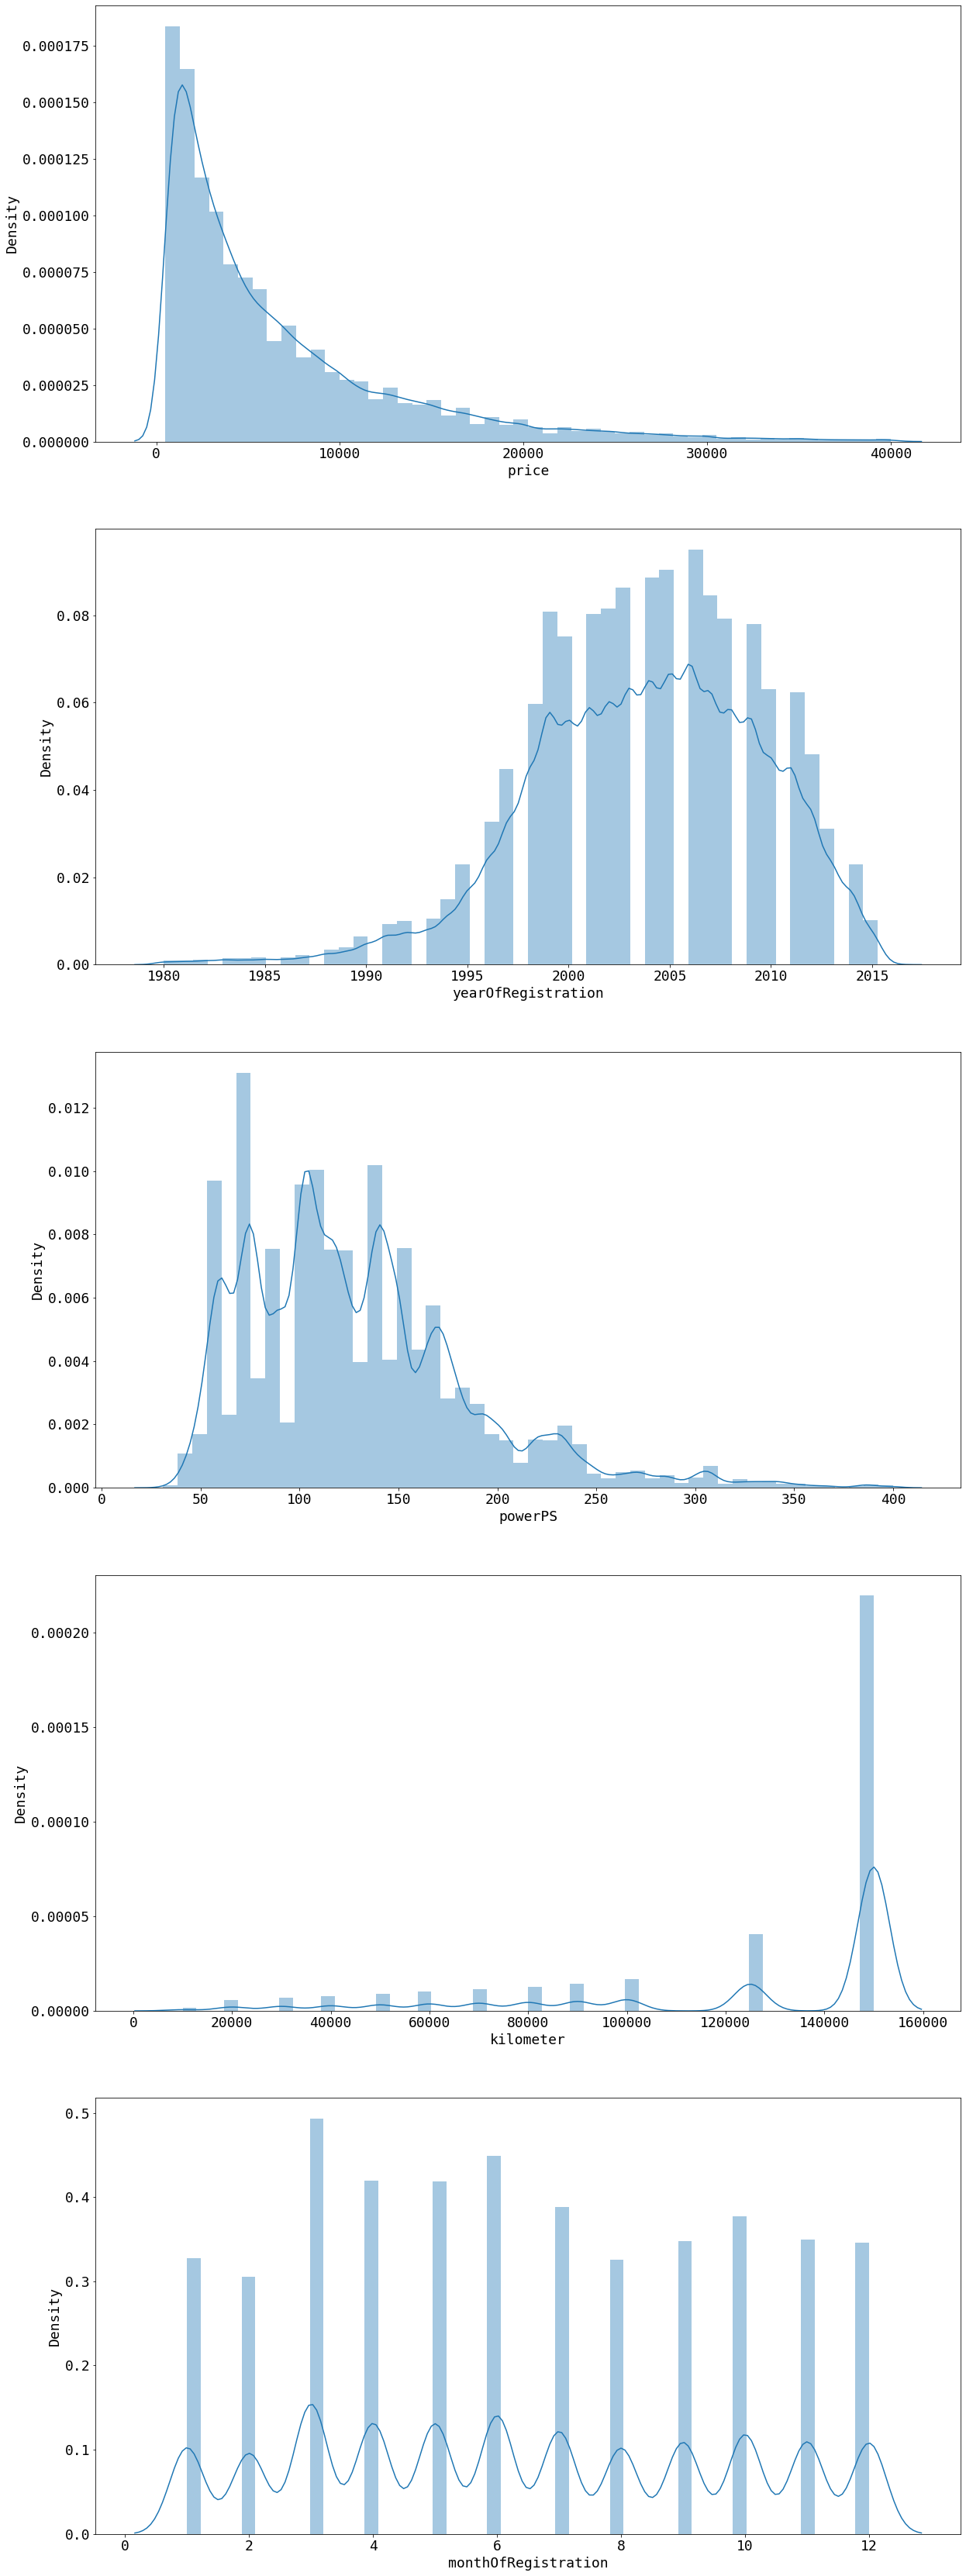

In [36]:
plt.figure(figsize=(20, 60))
for i, feat in enumerate(feats5):
    plt.subplot(5, 1, i+1)
    sns.distplot(a = df.loc[:, feat])

> Widać, że rozkład cen jest wyraźnie prawoskośny, mediana przyjmuje więc niższą wartość od średniej. Po wartości kwartyli zauważamy, że aż 75% wartości cen znajduje się poniżej 9 tysięcy.<br>
> Rozkład rocznika jest delikatnie lewoskośny.<br>
> Najwięcej samochodów jest w zakresie rocznika od ok. 1998 do 2011. <br>
> Sprzedawane samochody zazwyczaj posiadają moc silnika od ok. 60KM do 160KM <br>
> Znaczna większość samochodów ma bardzo duży przebieg 150 tys. oraz 125 tys. kilometrów. <br>
> Rozkład miesiąca rejestracji samochodu jest w dosyć równomierny, wyróżnia się marzec - najczęściej oraz luty - najrzadziej.

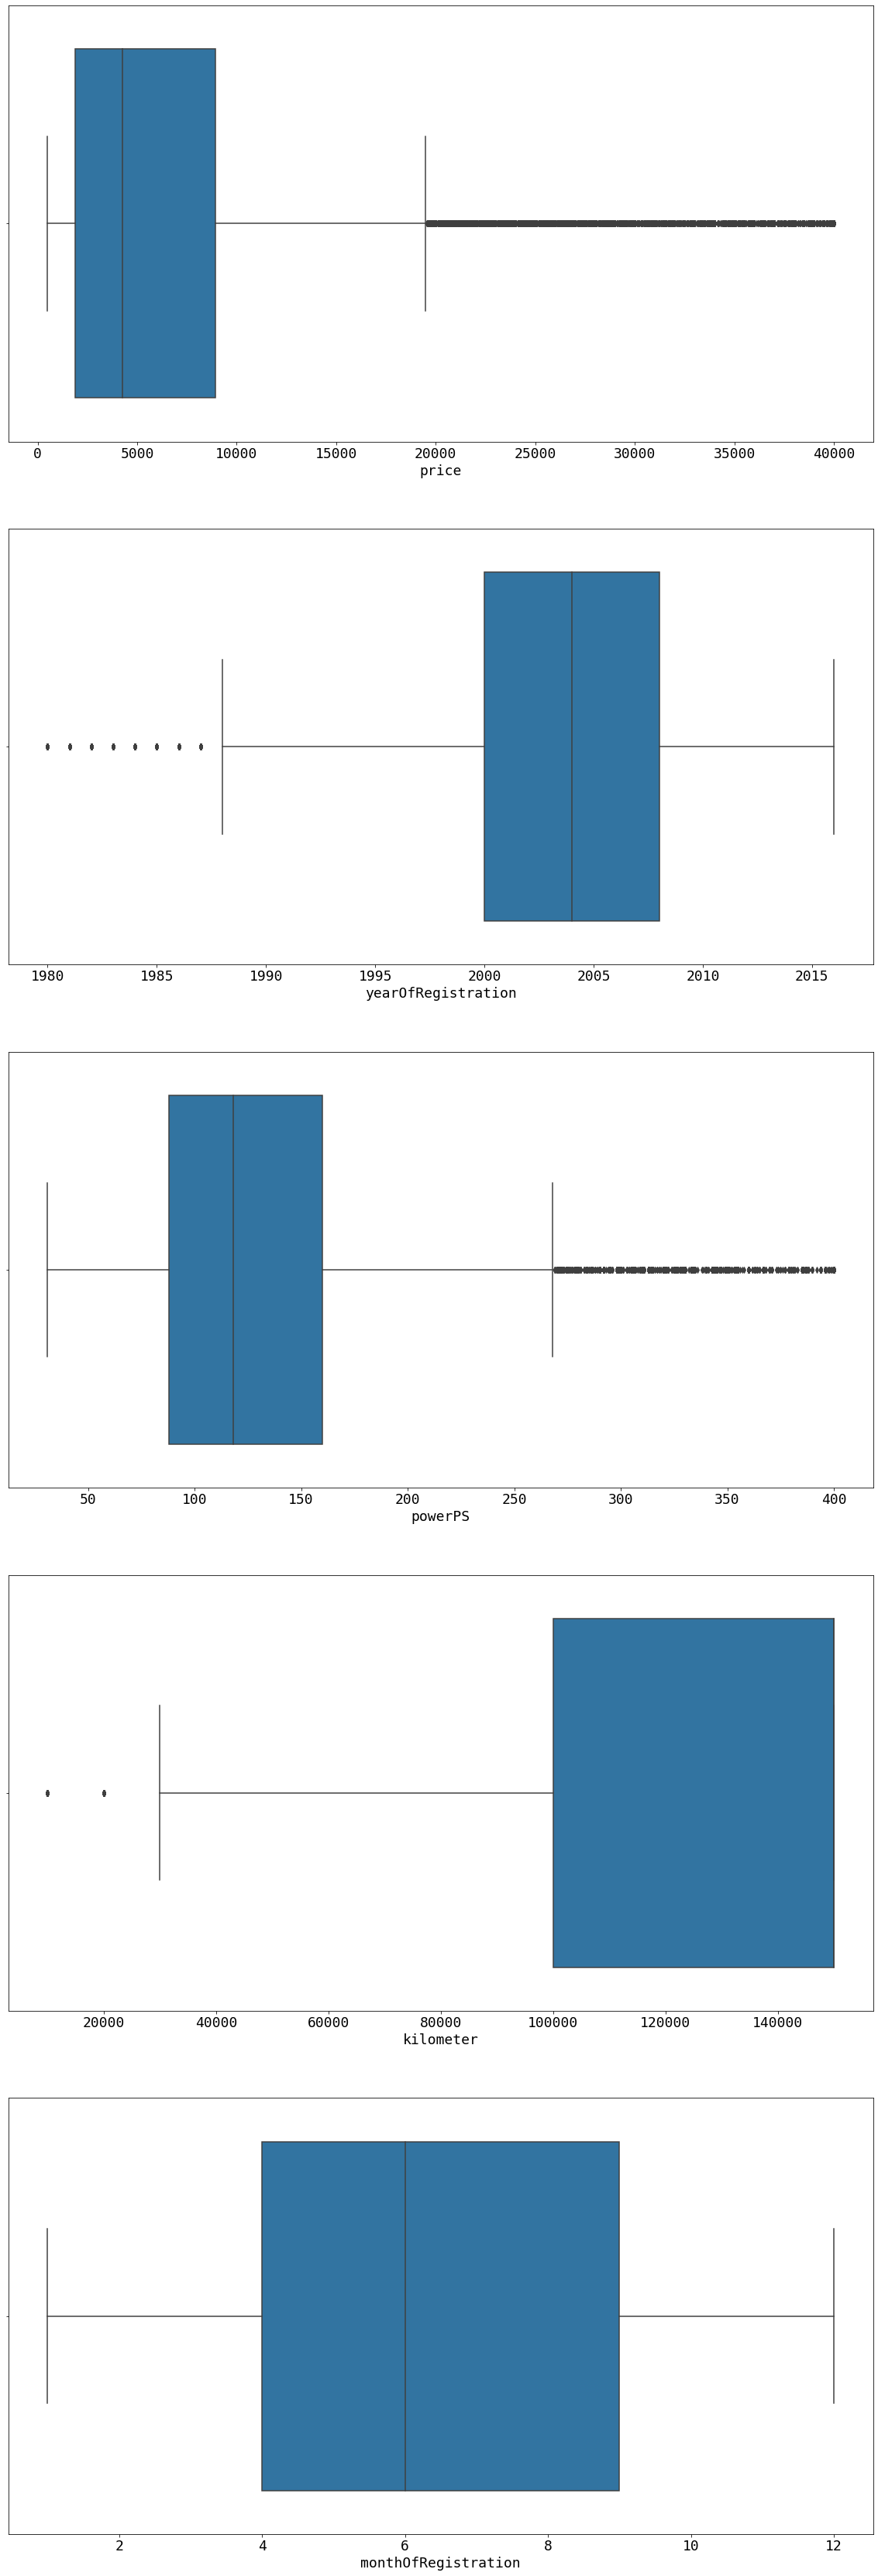

In [37]:
plt.figure(figsize=(20, 60))

for i, feat in enumerate(feats5):
    plt.subplot(5, 1, i+1)
    sns.boxplot(df[feat])

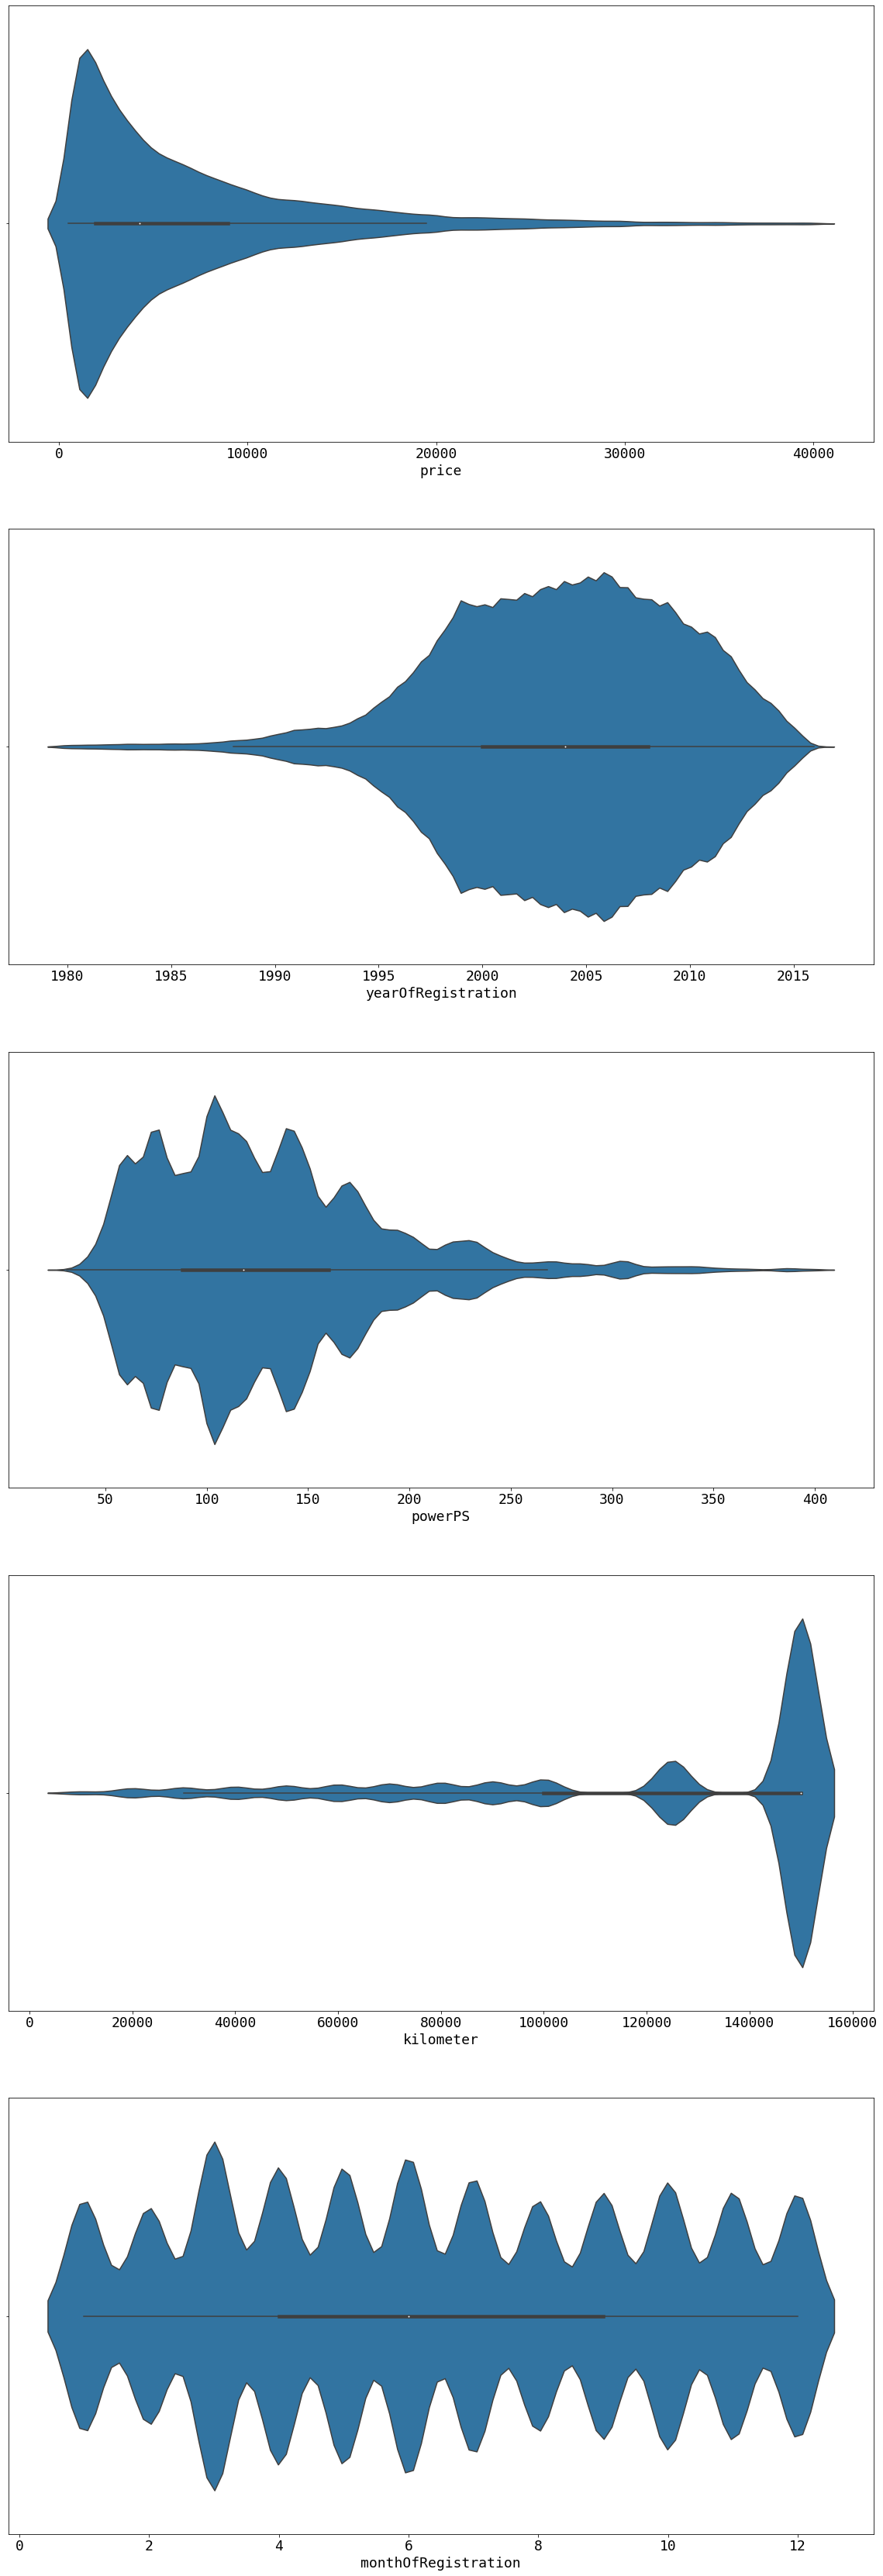

In [38]:
plt.figure(figsize=(20, 60))

for i, feat in enumerate(feats5):
    plt.subplot(5, 1, i+1)
    sns.violinplot(df[feat])

> Z wykresów pudełkowych i skrzypcowych możemy wynieść podobne obserwacje. Ciekawą rzecz jaką zaobserwowaliśmy na wykresie pudełkowym(co widać też przy funkcji describe()) dla cechy przebiegu "kilometer" jest to, że mediana jest równa wartości maksymalnej. Oznacza to, że conajmniej 50% rekordów samochodów ma przebieg 150tys. km. Po wykresie skrzypcowym można stwierdzić, że jest to nawet trochę ponad 50%.

In [39]:
df.skew()

price                      1.844027
yearOfRegistration        -0.502156
powerPS                    1.158466
kilometer                 -1.326059
monthOfRegistration        0.093885
budget                     1.275452
average                    0.328841
luxurious                  0.629132
vehicleType_andere        12.289521
vehicleType_bus            2.724318
vehicleType_cabrio         3.259546
vehicleType_coupe          3.961427
vehicleType_kleinwagen     1.366193
vehicleType_kombi          1.448759
vehicleType_limousine      0.891599
vehicleType_suv            4.229072
automatik                  1.242186
manuell                   -1.242186
fuelType_andere           84.983600
fuelType_benzin           -0.541017
fuelType_cng              23.849132
fuelType_diesel            0.625695
fuelType_elektro          87.683265
fuelType_hybrid           33.651023
fuelType_lpg               7.758452
dtype: float64

## Podsumowanie

### Pozostawione cechy
#### Kategoryczne:
* vehicleType - typ nadwozia: suv, kompakt, kabriolet, limuzyna, van, kombi, coupe, inne
* gearbox - rodzaj skrzyni biegów: automatyczna, manualna
* fuelType - rodzaj paliwa: diesel, benzyna, lpg, inne, hybryda, cng, elektryczny
* brand - marka pojazdu, podzielona i przypisana zakresom cenowym

Powyższe cechy zostały zamienione na cechy numeryczne przy pomocy kodowania one-hot encoding.

#### Numeryczne:
* price - cena, cecha objaśniana
* yearOfRegistration - rok rejestracji
* monthOfRegistration - miesiąc rejestracji
* powerPS - moc silnika [KM] 
* kilometer - przebieg [km]


### Usunięte cechy
* dataCrawled, dataCreated, lastSeen - daty pozyskania informacji o aukcji , utworzenia i ostatniego razu ujrzenia jej
* name - pełna nazwa pojazdu - dla praktycznie każdego rekordu cecha ta byłaby unikatowa
* model - model pojazdu - usunięta z braku pewności że dla wszystkich ponad 300 tys. rekordów wartość tej cechy jest zgodna z modelem, ponieważ występowały różne dziwne wartości np: 4_reihe, 6_reihe
* abtest - brak informacji o czym jest ta cecha
* seller, offerType, nrOfPictures - po usunięciu wybrakowanych danych w całej kolumnie została tylko jedna wartość
* postalCode - kod pocztowy

Rekordy z wartością 'ja' w notRepairedDamage zostały usunięte, ponieważ reprezentowały uszkodzone pojazdy, następnie cecha została usunięta. <br>
Z cech price i powerPS usunięte zostały rekordy z wartością 0. Wiele wartości cech były odstające dlatego wyeliminowaliśme je po obserwacjach.

### Korelacja
Z macierzy korelacji można zauważyć najbardziej skorelowany są pary:
* price - yearOfRegistration
* price - powerPS
* price - kilometer

Co może świadczyć, że rok pierwszej rejestracji, moc i przebieg to najważniejsze czynniki określające wartość danego pojazdu. <br>
Poza tym można jeszcze zauważyć zależność pomiędzy:
* kilometer - yearOfRegistration (przebieg - rok pierwszej rejestracji)

Starszy pojazd miał więcej czasu na zrobienie większej ilości kilometrów. <br>
* powerPS -gearbox automatik (moc - rodzaj skrzyni biegów)

Pojazdy o większej mocy częsciej mają automatyczne skrzynie biegów.
* luxurious - powerPS

Luksusowe marki pojazdów częściej charakteryzują się wysoką mocą silnika
* vehicleType_kleinwagen - powerPs

Małe typy samochodów(małolitrażowe) zazwyczaj nie posiadają wysokich mocy silnika

## Hipoteza badawcza
Cena pojazdu w znaczącej większości zależy od jego roku produkcji (w przypadku naszych danych roku rejestracji), przebiegu i mocy pojazdu. <br> Naszą hipotezę podbudowujemy na podstawie przeprowadzonych obserwacji i wyciągniętych wniosków odnośnie zależności między tymi cechami a zmienną objaśnianą czyli ceną na podstawie macierzy korelacji oraz na podstawie wykresów, które dokładnie obrazowały jak rośnie/maleje cena na podstawie poszczególnych wartości wybranych w tej hipotezie cech objaśniających.
<br> <br>
W analizie regresyjnej zastosujemy regresję:
* Liniową
* Grzbietową
* Lasso

## Podział zbioru i dobór cech

In [40]:
# Wydzielenie zbioru uczącego i testowego
ceny = df['price']
df.drop('price', axis=1, inplace=True)
auta_train, auta_test, ceny_train, ceny_test = train_test_split(df, ceny, test_size=0.2, random_state = 0)
cechy = df.columns.values
cechy 

array(['yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'budget', 'average', 'luxurious',
       'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi',
       'vehicleType_limousine', 'vehicleType_suv', 'automatik', 'manuell',
       'fuelType_andere', 'fuelType_benzin', 'fuelType_cng',
       'fuelType_diesel', 'fuelType_elektro', 'fuelType_hybrid',
       'fuelType_lpg'], dtype=object)

In [41]:
# Redukcja skośności cechy powerPS poprzez nałożenie logarytmu
auta_train['log_powerPS'] = auta_train['powerPS'].apply(lambda x: log(x))
auta_test['log_powerPS'] = auta_test['powerPS'].apply(lambda x: log(x))

In [42]:
# Dodanie cechy kwartały
auta_train['quarterOfRegistrationr'] = auta_train['monthOfRegistration'].apply(lambda x: math.floor((x+2)/3))
auta_test['quarterOfRegistrationr'] = auta_test['monthOfRegistration'].apply(lambda x: math.floor((x+2)/3))

In [43]:
def stepwise_back(features, X, y):    
    lr = LinearRegression()
    best_each_step = {}
    
    lr.fit(X[features], y)
    c_v_scores_start = cross_val_score(lr, X[features], y, scoring = "neg_mean_squared_error", n_jobs=-1)
    feature_error_start = (-1) * (sum(c_v_scores_start)/len(c_v_scores_start))
    
    while len(features) != 1:
        actual_min_error = feature_error_start
        feature_to_remove = 0
        
        for feat in features:
            tmp_features = list(features)
            tmp_features.remove(feat)
            
            c_v_scores = cross_val_score(lr, X[tmp_features], y, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
            
            feature_error = (-1) * (sum(c_v_scores) / len(c_v_scores))
            if feature_error < actual_min_error:
                actual_min_error = feature_error
                feature_to_remove = feat
        if feature_to_remove in features:
            features.remove(feature_to_remove)
            actual_features = ', '.join(features)
            best_each_step[actual_features] = actual_min_error
        else:
            break;
            
    print(f"Ostatecznie wybranych zostało {len(features)} cech dla selekcji krokowej w tył: ")
    print(features)
    return features

In [44]:
org_feat = np.ndarray.tolist(cechy).copy()
ext_feat1 = np.ndarray.tolist(cechy).copy()
ext_feat2 = np.ndarray.tolist(cechy).copy()

ext_feat1.append('log_powerPS')
ext_feat2.extend(['log_powerPS', 'quarterOfRegistrationr'])
ext_feat2.remove('monthOfRegistration')
all_feat = list(auta_train.columns.values)

In [45]:
stepwiseback_org_feat = stepwise_back(org_feat, auta_train, ceny_train)

stepwiseback_ext_feat1 = stepwise_back(ext_feat1, auta_train, ceny_train)

stepwiseback_ext_feat2 = stepwise_back(ext_feat2, auta_train, ceny_train)

stepwiseback_all_feat = stepwise_back(all_feat, auta_train, ceny_train)

Ostatecznie wybranych zostało 17 cech dla selekcji krokowej w tył: 
['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'budget', 'luxurious', 'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'manuell', 'fuelType_diesel', 'fuelType_hybrid', 'fuelType_lpg']
Ostatecznie wybranych zostało 18 cech dla selekcji krokowej w tył: 
['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'budget', 'average', 'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_limousine', 'vehicleType_suv', 'manuell', 'fuelType_diesel', 'fuelType_hybrid', 'fuelType_lpg', 'log_powerPS']
Ostatecznie wybranych zostało 19 cech dla selekcji krokowej w tył: 
['yearOfRegistration', 'powerPS', 'kilometer', 'average', 'luxurious', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 

In [66]:
def lasso(features, X, y):
    normalized_all_features = X.copy()
    
    for feat in features:
        maxes = auta_train[feat].max()
        mins = auta_train[feat].min()
        
        normalized_all_features[feat] = [(float(i) - float(mins)) / (float(maxes) - float(mins)) for i in auta_train[feat]]
        
    lasso_alphas = [0, 0.01]
    for i in range(1, 11):
        lasso_alphas.append(lasso_alphas[i]*2)
        
    score_per_lambda = []
    
    for i in range(len(lasso_alphas)):
        model_Lasso = Lasso(alpha = lasso_alphas[i])
        
        c_v_scores_Lasso = cross_val_score(model_Lasso, normalized_all_features, y, scoring = "neg_mean_squared_error", cv = 5)
        feature_error_Lasso = (-1) * (sum(c_v_scores_Lasso) / len(c_v_scores_Lasso))
        
        score_per_lambda.append([feature_error_Lasso, lasso_alphas[i]])
        
    best_features = []
    lambda_of_best_score = min(score_per_lambda)
    
    counter = 0
    model_Lasso_best = Lasso(alpha = lambda_of_best_score[1])
    model_Lasso_best.fit(normalized_all_features, y)
    
    for feat in features:
        best_features.append([(model_Lasso_best.coef_[counter]), feat])
        counter += 1
    
    best_features.sort(reverse=True)
    print("Cechy wybrane dla Lasso:")
    best_features_f = [z[1] for z in best_features if abs(z[0]) > 0]
    print(best_features)
    return best_features_f, best_features;

In [67]:
aaa, bbb = lasso(all_feat, auta_train, ceny_train)

Cechy wybrane dla Lasso:
[[31571.184225431105, 'powerPS'], [14005.687354272699, 'yearOfRegistration'], [1987.6724453045638, 'fuelType_andere'], [1881.8323128912032, 'vehicleType_kleinwagen'], [1008.7331877819652, 'vehicleType_kombi'], [814.6278019616077, 'vehicleType_bus'], [789.7310436225674, 'vehicleType_coupe'], [536.4123184352663, 'fuelType_benzin'], [-0.0, 'vehicleType_cabrio'], [-0.0, 'log_powerPS'], [-0.0, 'fuelType_elektro'], [-0.0, 'fuelType_cng'], [-182.77088356337333, 'monthOfRegistration'], [-314.2102523769917, 'automatik'], [-331.6828632867995, 'fuelType_lpg'], [-540.0648118381375, 'luxurious'], [-702.4753098375933, 'vehicleType_suv'], [-1025.3892189258365, 'vehicleType_limousine'], [-1864.8569644229053, 'budget'], [-8338.970022026566, 'kilometer']]


In [52]:
lasso_org_feat = lasso(org_feat, auta_train, ceny_train)

lasso_ext_feat1 = lasso(ext_feat1, auta_train, ceny_train)

lasso_ext_feat2 = lasso(ext_feat2, auta_train, ceny_train)

lasso_all_feat = lasso(all_feat, auta_train, ceny_train)

Cechy wybrane dla Lasso:
[[31638.386066203606, 'powerPS'], [14009.38876462057, 'yearOfRegistration'], [1988.9817063880705, 'fuelType_diesel'], [1883.1621673670797, 'vehicleType_kleinwagen'], [1009.7283272194362, 'vehicleType_kombi'], [814.4170827952448, 'vehicleType_andere'], [791.2574267083522, 'vehicleType_cabrio'], [535.6771612697748, 'fuelType_hybrid'], [-0.0, 'vehicleType_bus'], [-0.0, 'fuelType_lpg'], [-182.51085895224017, 'monthOfRegistration'], [-313.0228576165101, 'manuell'], [-541.2233975434364, 'luxurious'], [-700.7798348425591, 'vehicleType_suv'], [-1028.7469462685485, 'vehicleType_limousine'], [-1866.397596079373, 'budget'], [-8338.615488812531, 'kilometer']]
Cechy wybrane dla Lasso:
[[31571.184225431105, 'powerPS'], [14005.687354272699, 'yearOfRegistration'], [1987.6724453045638, 'fuelType_diesel'], [1881.8323128912032, 'vehicleType_coupe'], [1008.7331877819652, 'vehicleType_kleinwagen'], [814.6278019616077, 'vehicleType_andere'], [789.7310436225674, 'vehicleType_cabrio']

## Regularyzacja

In [53]:
listoflists = []
listoflists.append(stepwiseback_org_feat)
listoflists.append(stepwiseback_ext_feat1)
listoflists.append(stepwiseback_ext_feat2)
listoflists.append(stepwiseback_all_feat)

In [54]:
for features in listoflists:
    ridge_lambdas = [0.01]
    for i in range(0,10):
        ridge_lambdas.append(ridge_lambdas[i] * 2)
        
    c_v_Ridge_stepback = GridSearchCV(estimator = Ridge(), param_grid = {'alpha' : ridge_lambdas}, scoring = 'neg_mean_squared_error', cv = 5, return_train_score = True)
    c_v_Ridge_stepback.fit(auta_train[features], ceny_train)
    
    print(c_v_Ridge_stepback.best_estimator_)
    print((c_v_Ridge_stepback.cv_results_['mean_train_score'] * (-1)).mean())

Ridge(alpha=0.64)
12617506.38436137
Ridge(alpha=1.28)
12272509.727589529
Ridge(alpha=2.56)
12272407.056472374
Ridge(alpha=2.56)
12272256.225838028


In [55]:
listoflists2 = []
listoflists2.append(lasso_org_feat)
listoflists2.append(lasso_ext_feat1)
listoflists2.append(lasso_ext_feat2)
listoflists2.append(lasso_all_feat)

In [56]:
for features in listoflists2:
    ridge_lambdas = [0.01]
    for i in range (0,10):
        ridge_lambdas.append(ridge_lambdas[i]*2)
    
    c_v_Ridge_Lasso = GridSearchCV(estimator = Ridge(), param_grid = {'alpha' : ridge_lambdas}, scoring = 'neg_mean_squared_error', cv = 10, return_train_score = True)
    c_v_Ridge_Lasso.fit(auta_train[features], ceny_train)
    
    print(c_v_Ridge_Lasso.best_estimator_)
    print((c_v_Ridge_Lasso.cv_results_['mean_train_score'] * (-1)).mean())

Ridge(alpha=1.28)
12639756.237773161
Ridge(alpha=1.28)
12782172.531405251
Ridge(alpha=2.56)
12418570.653723584
Ridge(alpha=1.28)
12637413.859303333


## Testy modeli

Zbiory cech:
* Zbiór 1. - stepwiseback_org_feat - cechy wybrane przez slekecję krokową w tył, ze zbioru cech oryginalnych
* Zbiór 2. - stepwiseback_ext_feat1 - cechy wybrane przez slekecję krokową w tył, ze zbioru cech rozszerzonego o log_powerPS
* Zbiór 3. - stepwiseback_ext_feat2 - cechy wybrane przez slekecję krokową w tył, ze zbioru cech rozszerzonego o log_powerPS i quarter of Registration
* Zbiór 4. - stepwiseback_org_feat - cechy wybrane przez slekecję krokową w tył, ze wszystkich cech
* Zbiór 5. - lasso_org_feat - cechy wybrane przez metodę lasso, ze zbioru cech oryginalnych
* Zbiór 6. - lasso_ext_feat1 - cechy wybrane przez metodę lasso, ze zbioru cech rozszerzonego o log_powerPS
* Zbiór 7. - lasso_ext_feat2 - cechy wybrane przez metodę lasso, ze zbioru cech rozszerzonego o log_powerPS i quarter of Registration
* Zbiór 8. - lasso_org_feat - cechy wybrane przez metodę lasso, ze wszystkich cech
* Zbiór 9. - zbiór cech oryginalnych
* Zbiór 10. - zbiór wszystkich cech

In [57]:
alphas = [0.64, 1.28, 2.56, 2.56]
for i, feat in enumerate(listoflists):
    model = Ridge(alpha = alphas[i])
    model.fit(auta_train[feat], ceny_train)
    pred_train = model.predict(auta_train[feat])
    pred_test = model.predict(auta_test[feat])

    print("Regresja na zbiorze cech nr " + str(i+1) + ". + regularyzacja grzbietowa.")
    print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
    print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 1. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7127201130799501 --- 71.27%
Wynik na zbiorze testowym: 0.7073454644935078 --- 70.73%

Regresja na zbiorze cech nr 2. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7205747242968616 --- 72.06%
Wynik na zbiorze testowym: 0.714524380396875 --- 71.45%

Regresja na zbiorze cech nr 3. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7205765762045169 --- 72.06%
Wynik na zbiorze testowym: 0.7145184640227342 --- 71.45%

Regresja na zbiorze cech nr 4. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7205799891204453 --- 72.06%
Wynik na zbiorze testowym: 0.7145194899219807 --- 71.45%



In [58]:
for i, feat in enumerate(listoflists):
    model = LinearRegression()
    model.fit(auta_train[feat], ceny_train)
    pred_train = model.predict(auta_train[feat])
    pred_test = model.predict(auta_test[feat])

    print("Regresja na zbiorze cech nr " + str(i+1) + ". bez regularyzacji.")
    print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
    print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 1. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7127201145188186 --- 71.27%
Wynik na zbiorze testowym: 0.7073456552638989 --- 70.73%

Regresja na zbiorze cech nr 2. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7205747348722247 --- 72.06%
Wynik na zbiorze testowym: 0.7145240281372824 --- 71.45%

Regresja na zbiorze cech nr 3. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7205769135000044 --- 72.06%
Wynik na zbiorze testowym: 0.7145073323537201 --- 71.45%

Regresja na zbiorze cech nr 4. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7205803259366479 --- 72.06%
Wynik na zbiorze testowym: 0.7145083075355865 --- 71.45%



In [59]:
alphas = [1.28, 1.28, 2.56, 1.28]
for i, feat in enumerate(listoflists2):
    model = Ridge(alpha = alphas[i])
    model.fit(auta_train[feat], ceny_train)
    pred_train = model.predict(auta_train[feat])
    pred_test = model.predict(auta_test[feat])

    print("Regresja na zbiorze cech nr " + str(i+5) + ". + regularyzacja grzbietowa.")
    print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
    print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 5. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7122191628874881 --- 71.22%
Wynik na zbiorze testowym: 0.7069519007550991 --- 70.70%

Regresja na zbiorze cech nr 6. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.708976607921286 --- 70.90%
Wynik na zbiorze testowym: 0.7032682293705927 --- 70.33%

Regresja na zbiorze cech nr 7. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7172546892220053 --- 71.73%
Wynik na zbiorze testowym: 0.7114385711195439 --- 71.14%

Regresja na zbiorze cech nr 8. + regularyzacja grzbietowa.
Wynik na zbiorze treningowym: 0.7122724498396179 --- 71.23%
Wynik na zbiorze testowym: 0.7068612383375623 --- 70.69%



In [60]:
for i, feat in enumerate(listoflists2):
    model = LinearRegression()
    model.fit(auta_train[feat], ceny_train)
    pred_train = model.predict(auta_train[feat])
    pred_test = model.predict(auta_test[feat])

    print("Regresja na zbiorze cech nr " + str(i+5) + ". bez regularyzacji.")
    print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
    print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 5. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7122191684698735 --- 71.22%
Wynik na zbiorze testowym: 0.7069523062554798 --- 70.70%

Regresja na zbiorze cech nr 6. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7089766135595214 --- 70.90%
Wynik na zbiorze testowym: 0.7032684175415789 --- 70.33%

Regresja na zbiorze cech nr 7. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7172549773010617 --- 71.73%
Wynik na zbiorze testowym: 0.7114278454593078 --- 71.14%

Regresja na zbiorze cech nr 8. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7122724734597565 --- 71.23%
Wynik na zbiorze testowym: 0.7068611461142869 --- 70.69%



In [61]:
# regresja dla oryginalnych cech
model = LinearRegression()
model.fit(auta_train[cechy], ceny_train)
pred_train = model.predict(auta_train[cechy])
pred_test = model.predict(auta_test[cechy])

print("Regresja na zbiorze cech nr 9. bez regularyzacji.")
print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 9. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7127257611987394 --- 71.27%
Wynik na zbiorze testowym: 0.7073406963251051 --- 70.73%



In [62]:
# regresja dla wszystkich cech
model = LinearRegression()
model.fit(auta_train, ceny_train)
pred_train = model.predict(auta_train)
pred_test = model.predict(auta_test)

print("Regresja na zbiorze cech nr 10. bez regularyzacji.")
print("Wynik na zbiorze treningowym: {} --- {:.2f}%".format(r2_score(ceny_train, pred_train), r2_score(ceny_train, pred_train)*100))
print("Wynik na zbiorze testowym: {} --- {:.2f}%\n".format(r2_score(ceny_test, pred_test), r2_score(ceny_test, pred_test)*100))

Regresja na zbiorze cech nr 10. bez regularyzacji.
Wynik na zbiorze treningowym: 0.7205847019396141 --- 72.06%
Wynik na zbiorze testowym: 0.7145172489771566 --- 71.45%



## Podsumowanie i wnioski
 
> Opracowanie modelu regresji rozpoczęliśmy od doboru cech. Na różnych zbiorach cech przeprowadziliśmy selekcję krokową w tył oraz metodę lasso.
> Użyliśmy poniższych zbiorów:
> * Cechy oryginalne
> * Cechy oryginalne z dodatkową cechą log_powerPS
> * Cechy oryginalne z dodatkowymi cechami log_powerPS i quarterOfRegistartion z pominięciem cechy monthOfRegistration
> * Cechy oryginalne z dodatkowymi cechami log_powerPS i quarterOfRegistartion

> Następnie zbadaliśmy dokładność regresji z regularyzacją grzbietową na otrzymanych wcześniej zbiorach cech dla różnych wartości parametru alpha.
> Ostatecznie sprawdziliśmy dokładność modeli z regularyzacją i bez regularyzacji na wyznaczonych zbiorach.
> Dodatkowo sprawdziliśmy dokładność regresji na cechach oryginalnych oraz na cechcach oryginalnych z dodatkowymi cechami log_powerPS i quarterOfRegistration.
 
> Po przeprowadzoniu doboru cech dochodzimy do wniosku, że założone przez nas najważniejsze cechy w hipotezie - rok rejestracji samochodu, przebieg samochodu i moc silnika rzeczywiście okazały się najistotniejsze przy określaniu ceny samochodów zarówno przy wyborze cech poprzez selekcję krokową w tył jak i w metodzie Lasso niezależnie od badanego zbioru cech, które utworzyliśmy przy uczeniu modeli.
> Im nowszy rok rejestracji i większa moc tym cena bardziej rośnie, a wraz ze wzrostem przebiegu cena maleje. <br>
 
> Dodatkowo typ paliwa diesiel również ma duży wpływ na cenę - najbardziej ze wszystkich uwzględnionych rodzaji paliw. Na podstawie doboru cech nadwozie suv i cabrio to kolejne najważniejsze cechy zaraz po wcześniej wymienionych. Samochody luksusowych z jasnych względów także mają duży wpływ na wzrost ceny. <br>
 
> Zauważyliśmy także na podstawie wag innych cech, że samochody z nadwoziem kombi, lub kleinwagen - zanijżają cene. Także samochody zasilane LPG skutkują zmaleniem ceny co może wiązać się z brakiem popularności tego typu paliwa w Niemczech.
> Ta sama zasada tyczy się samochodów budżetowych z jasnych przyczyn.<br>
 
> Najlepszy wynik R2 dla zbioru testowego - 71.45% osiągneliśmy dla modelu regresji liniowej zarówno z regularyzacją jak i bez regularyzacji. 
>  Wynik ten uzyskany został dla zbioru zawierająceg wszystkie cechy oraz dla poniższych zbiorów:
> * 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'budget', 'average', 'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_limousine', 'vehicleType_suv', 'manuell', 'fuelType_diesel', 'fuelType_hybrid', 'fuelType_lpg', 'log_powerPS'
> * 'yearOfRegistration', 'powerPS', 'kilometer', 'average', 'luxurious', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'automatik', 'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 'fuelType_elektro', 'fuelType_lpg', 'log_powerPS'
> * 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'budget', 'luxurious', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'automatik', 'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 'fuelType_elektro', 'fuelType_lpg', 'log_powerPS'
